In [1]:
#AUTO INSURANCE CLAIM PREDICTION 


In [2]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [3]:
# Load the 'Auto Insurance Claim' data

Auto_Claim = pd.read_csv(r"C:\Users\sriha\Data Science\CAPSTONE PROJECT\synthetic data generated\auto claim insurance data set was synthetic generated\Auto_Insurance_claim_synthetic_genereated_data.csv", header=0)

# Copy the file to back-up

Auto_Claim_bk = Auto_Claim.copy()

# Display first 5 rows in the dataset

Auto_Claim_bk.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,11/4/2019,VJ-130653912,Van,1176.40,EA,CA,63,Male,Married,PhD,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,NaN,NaN,No
1,4/8/2018,BI-158124192,Car,1587.37,EA,OR,29,Female,Married,Masters,ITENGINEER,18,Pleasure,10875,1,0,Basic,CL000026353,Yes,3/22/2018,Yes,No,No,18623.00,BMW,23710.32,Rural,Major,Yes
2,8/3/2015,DZ-175413016,Car,1268.38,IA,OR,66,Male,Married,High School,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,NaN,NaN,No
3,6/8/2015,QX-179005448,Car,1921.00,IA,AZ,89,Male,Divorced,PhD,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,NaN,NaN,No
4,1/4/2018,KM-194622292,Car,1582.98,EA,NV,69,Male,Married,High School,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,NaN,NaN,No


In [4]:
# Display the size of the dataset

Auto_Claim_bk.shape

(285130, 29)

In [5]:
# Display the columns in concrete dataset

Auto_Claim_bk.columns

Index(['Inception_Date', 'Policy_Number', 'Policy_Type', 'Policy_Premium',
       'Channel', 'State', 'Age', 'Gender', 'Marital_Status', 'Education',
       'Profession', 'Driving_Exp', 'Vehicle_Usage', 'Annual_Miles',
       'Previous_Citations', 'Prevous_Accidents', 'Coverage_Type',
       'Claim_Number', 'Umbrella_Policy', 'Accident_Date', 'Police_File',
       'Any_Eye_Witness', 'Hired_Attorney', 'Claim_Paid_Out', 'Make',
       'Vehicle_Cost', 'Road_Type', 'Accident_Severity', 'Claimed'],
      dtype='object')

In [6]:
# DISPLAY INFO

Auto_Claim_bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285130 entries, 0 to 285129
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Inception_Date      285130 non-null  object 
 1   Policy_Number       285130 non-null  object 
 2   Policy_Type         285130 non-null  object 
 3   Policy_Premium      285130 non-null  float64
 4   Channel             285130 non-null  object 
 5   State               285130 non-null  object 
 6   Age                 285130 non-null  int64  
 7   Gender              285130 non-null  object 
 8   Marital_Status      285130 non-null  object 
 9   Education           285130 non-null  object 
 10  Profession          285130 non-null  object 
 11  Driving_Exp         285130 non-null  int64  
 12  Vehicle_Usage       285130 non-null  object 
 13  Annual_Miles        285130 non-null  int64  
 14  Previous_Citations  285130 non-null  int64  
 15  Prevous_Accidents   285130 non-nul

In [7]:
#STEP-1:CHECK THE DUPLICATE AND LOW VARIATION DATA

In [8]:
#CHECK FOR DUPLICTAE VALUES
#Displaying Duplicate values with in DATASET, if avialble

Auto_Claim_bk_dup = Auto_Claim_bk[Auto_Claim_bk.duplicated(keep='last')]
Auto_Claim_bk_dup

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed


In [9]:
#IF EXIST DELETE THE DUPLICATE VALUES
#Remove the identified duplicate records 

Auto_Claim_bk = Auto_Claim_bk.drop_duplicates()
Auto_Claim_bk.shape

(285130, 29)

In [10]:
#STEP-2:IDENTIFYING AND ADDRESSING THE MISSING VALUES AND VARIABLES
    

In [11]:
# Identify the missing data in all variables

Auto_Claim_bk.isnull().sum()

Inception_Date             0
Policy_Number              0
Policy_Type                0
Policy_Premium             0
Channel                    0
State                      0
Age                        0
Gender                     0
Marital_Status             0
Education                  0
Profession                 0
Driving_Exp                0
Vehicle_Usage              0
Annual_Miles               0
Previous_Citations         0
Prevous_Accidents          0
Coverage_Type              0
Claim_Number              39
Umbrella_Policy            0
Accident_Date            126
Police_File                0
Any_Eye_Witness            0
Hired_Attorney             0
Claim_Paid_Out             0
Make                       0
Vehicle_Cost               0
Road_Type             256211
Accident_Severity     256650
Claimed                    0
dtype: int64

In [12]:
# functions for better visualization of the posterior plots

def resizeplot():
    plt.figure(figsize=(12,6))
    
# function for correlations plots

def resizecorr():
    plt.figure(figsize=(15,7))

<Axes: >

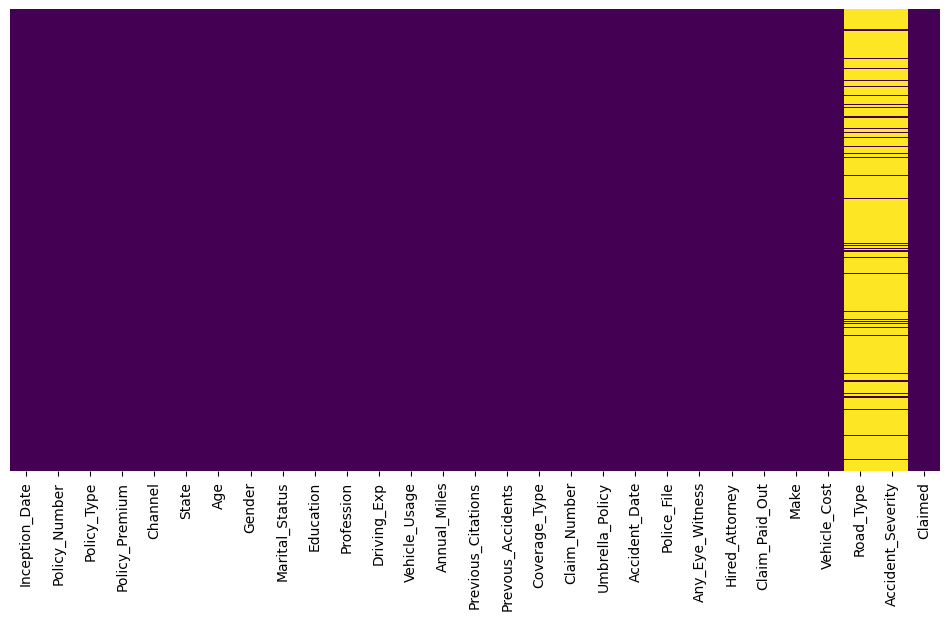

In [13]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(Auto_Claim_bk.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
#MUTATION TECHNIQUES(FOR FILLING THE MISSING VALUES)

In [15]:
# Identify the numerical and categorical variables

num_vars = Auto_Claim_bk.columns[Auto_Claim_bk.dtypes != 'object']
cat_vars = Auto_Claim_bk.columns[Auto_Claim_bk.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['Policy_Premium', 'Age', 'Driving_Exp', 'Annual_Miles',
       'Previous_Citations', 'Prevous_Accidents', 'Claim_Paid_Out',
       'Vehicle_Cost'],
      dtype='object')
Index(['Inception_Date', 'Policy_Number', 'Policy_Type', 'Channel', 'State',
       'Gender', 'Marital_Status', 'Education', 'Profession', 'Vehicle_Usage',
       'Coverage_Type', 'Claim_Number', 'Umbrella_Policy', 'Accident_Date',
       'Police_File', 'Any_Eye_Witness', 'Hired_Attorney', 'Make', 'Road_Type',
       'Accident_Severity', 'Claimed'],
      dtype='object')


In [16]:
# Use KNNImputer to address missing values
#KNNImputer-used only for replacing numerical values

#from sklearn.impute import KNNImputer

#imputer_int = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean',
#                        copy=True, add_indicator=False)

#Auto_Claim_bk['Age'] = imputer_str.fit_transform(Auto_Claim_bk[['Age']])

In [17]:
# Use SimpleImputer to address missing values

from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)

Auto_Claim_bk['Claim_Number'] = imputer_str.fit_transform(Auto_Claim_bk[['Claim_Number']])
Auto_Claim_bk['Accident_Date'] = imputer_str.fit_transform(Auto_Claim_bk[['Accident_Date']])
Auto_Claim_bk['Road_Type'] = imputer_str.fit_transform(Auto_Claim_bk[['Road_Type']])
Auto_Claim_bk['Accident_Severity'] = imputer_str.fit_transform(Auto_Claim_bk[['Accident_Severity']])


In [18]:
Auto_Claim_bk.isnull().sum()

Inception_Date        0
Policy_Number         0
Policy_Type           0
Policy_Premium        0
Channel               0
State                 0
Age                   0
Gender                0
Marital_Status        0
Education             0
Profession            0
Driving_Exp           0
Vehicle_Usage         0
Annual_Miles          0
Previous_Citations    0
Prevous_Accidents     0
Coverage_Type         0
Claim_Number          0
Umbrella_Policy       0
Accident_Date         0
Police_File           0
Any_Eye_Witness       0
Hired_Attorney        0
Claim_Paid_Out        0
Make                  0
Vehicle_Cost          0
Road_Type             0
Accident_Severity     0
Claimed               0
dtype: int64

<Axes: >

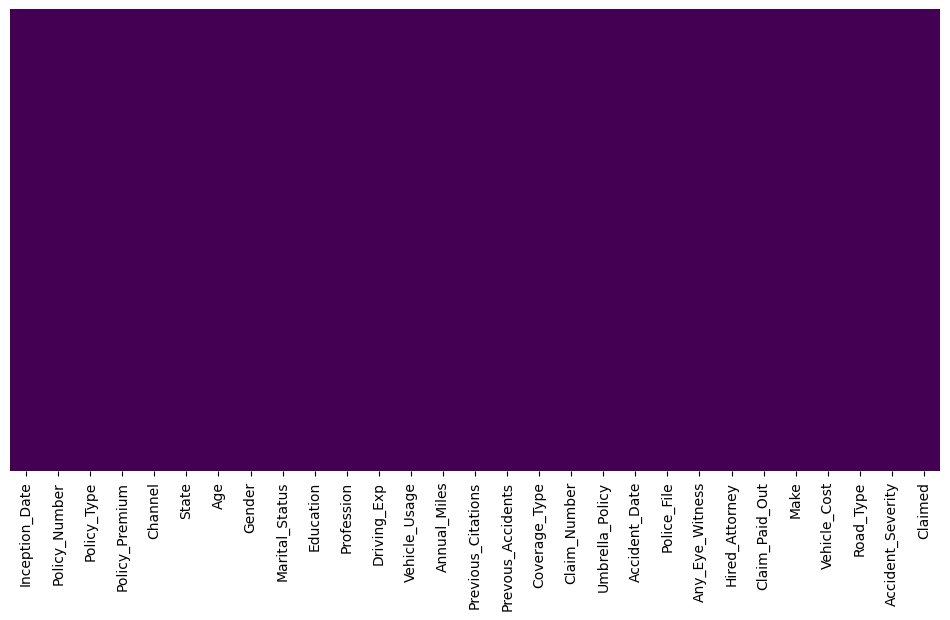

In [19]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(Auto_Claim_bk.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
Auto_Claim_bk.sample(10)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
112058,9/16/2017,KB-131048376,Truck,2095.51,IA,CA,28,Male,Single,High School,Student,3,Pleasure,16464,0,1,Balanced,CL000022131,No,4/6/2016,Yes,Yes,Yes,32213.89,Datsun,15149.52,Country side,Major,Yes
241025,11/28/2017,HK-141915816,Car,1453.98,IA,CA,51,Male,Married,Masters,Engineer,52,Pleasure,15855,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,9.64,Honda,25028.92,Semi Urban,Major,No
116486,1/24/2015,EJ-138544920,Car,2009.23,IA,CA,27,Male,Single,High School,Student,3,Pleasure,16732,1,1,Balanced,CL000024391,No,3/10/2014,Yes,Yes,Yes,33596.95,Datsun,23767.79,Semi Urban,Major,Yes
193041,11/14/2019,AP-196554925,Car,1526.36,EA,OR,51,Male,Married,Bachelors,Engineer,32,Business,26060,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Honda,23005.15,Semi Urban,Major,No
145209,12/12/2017,XH-175664180,Car,1381.69,IA,AZ,30,Male,Married,Masters,ITENGINEER,15,Commute,15994,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,5.75,Chevrolet,31912.94,Semi Urban,Major,No
90772,1/13/2014,VQ-193533045,Van,1466.79,IA,CA,32,Male,Married,High School,Worker,17,Pleasure,24025,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Volvo,13895.00,Semi Urban,Major,No
260375,5/31/2016,HW-134634471,Van,1217.98,EA,CA,20,Male,Single,Bachelors,Student,14,Pleasure,13941,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Chevrolet,23761.36,Semi Urban,Major,Yes
60328,6/29/2019,UR-197945828,Car,1503.60,IA,CA,28,Male,Married,Bachelors,Engineer,13,Pleasure,13946,0,1,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Hyundai,23886.13,Semi Urban,Major,No
106470,12/1/2014,KM-159862623,Car,1389.61,EA,OR,39,Male,Married,Masters,Engineer,22,Commute,16133,0,0,Basic,CL144120603,No,9/30/2018,No,No,No,3.75,Honda,24033.39,Semi Urban,Major,No
1763,4/20/2019,XE-193142362,Car,1510.55,EA,OR,31,Male,Married,Masters,ITENGINEER,18,Pleasure,27396,1,1,Basic,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,29569.23,Semi Urban,Major,No


In [21]:
#STEP-3:HANDLING THE OUTLIERS

In [22]:
#OUTLIERS ARE PERFORMED ONLY FOR CONTINOUS DATA OR CONTINOUS VARIABLES

In [23]:
# Display "Descriptive Statistical Analysis"

Auto_Claim_bk.describe().T

,count,mean,std,min,25%,50%,75%,max
Policy_Premium,285130.0,1564.061418,163.863521,1045.93,1453.7600,1560.030,1675.1075,2205.86
Age,285130.0,49.528457,18.402776,16.00,36.0000,48.000,63.0000,95.00
Driving_Exp,285130.0,30.381089,18.480502,0.00,16.0000,30.000,47.0000,74.00
Annual_Miles,285130.0,19593.167980,7367.392684,8425.00,13991.0000,16357.000,25332.0000,40443.00
Previous_Citations,285130.0,0.196146,0.397081,0.00,0.0000,0.000,0.0000,1.00
Prevous_Accidents,285130.0,0.330705,0.568392,0.00,0.0000,0.000,1.0000,2.00
Claim_Paid_Out,285130.0,1489.564096,5620.656085,0.00,0.0000,0.000,4.6600,38119.45
Vehicle_Cost,285130.0,25917.744646,11364.030058,11862.01,19252.9125,23814.895,28114.6650,77521.06


In [24]:
# Identify the numerical and categorical variables

num_vars = Auto_Claim_bk.columns[Auto_Claim_bk.dtypes != 'object']
cat_vars = Auto_Claim_bk.columns[Auto_Claim_bk.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['Policy_Premium', 'Age', 'Driving_Exp', 'Annual_Miles',
       'Previous_Citations', 'Prevous_Accidents', 'Claim_Paid_Out',
       'Vehicle_Cost'],
      dtype='object')
Index(['Inception_Date', 'Policy_Number', 'Policy_Type', 'Channel', 'State',
       'Gender', 'Marital_Status', 'Education', 'Profession', 'Vehicle_Usage',
       'Coverage_Type', 'Claim_Number', 'Umbrella_Policy', 'Accident_Date',
       'Police_File', 'Any_Eye_Witness', 'Hired_Attorney', 'Make', 'Road_Type',
       'Accident_Severity', 'Claimed'],
      dtype='object')


In [25]:
#Age

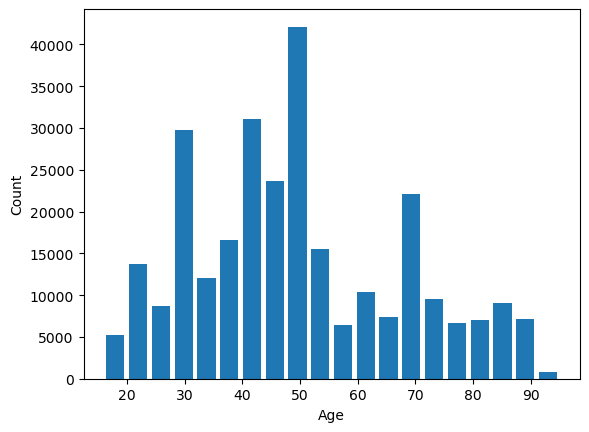

In [26]:
# Plot Histogram

plt.hist(Auto_Claim_bk.Age, bins=20, rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

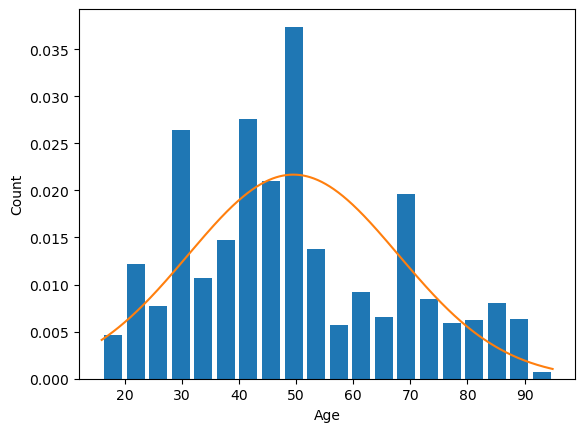

In [27]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(Auto_Claim_bk.Age, bins=20, rwidth=0.8, density=True)
plt.xlabel('Age')
plt.ylabel('Count')

rng = np.arange(Auto_Claim_bk.Age.min(),Auto_Claim_bk.Age.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Auto_Claim_bk.Age.mean(),Auto_Claim_bk.Age.std()))

In [28]:
# Eliminate the outlier in 'Age' and write data to new file

In [29]:
# Calculate upper limit
Age_UL = round(Auto_Claim_bk.Age.mean() + 3 * Auto_Claim_bk.Age.std(),3)
Age_UL

104.737

In [30]:
# Calculate Lower limit
Age_LL = round(Auto_Claim_bk.Age.mean() - 3 * Auto_Claim_bk.Age.std(),3)
Age_LL

-5.68

In [31]:
Auto_Claim_bk02 = Auto_Claim_bk[(Auto_Claim_bk.Age > Age_LL) & (Auto_Claim_bk.Age <Age_UL)]
Auto_Claim_bk02.shape

(285130, 29)

In [32]:
# Display the outlier in the dataset

Auto_Claim_bk[(Auto_Claim_bk.Age > Age_UL) & (Auto_Claim_bk.Age > Age_LL)]

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed


In [33]:
#Policy_Premium

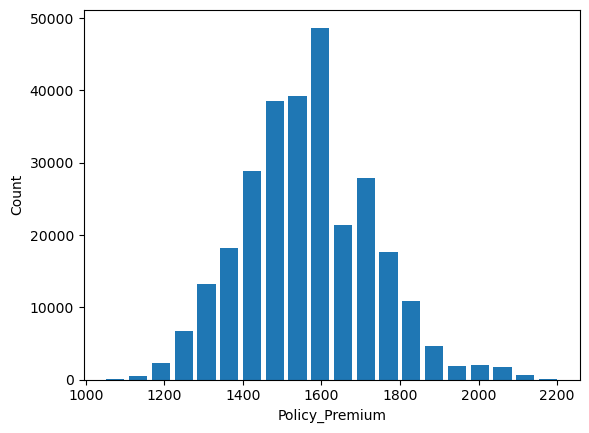

In [34]:
# Plot Histogram

plt.hist(Auto_Claim_bk.Policy_Premium, bins=20, rwidth=0.8)
plt.xlabel('Policy_Premium')
plt.ylabel('Count')
plt.show()

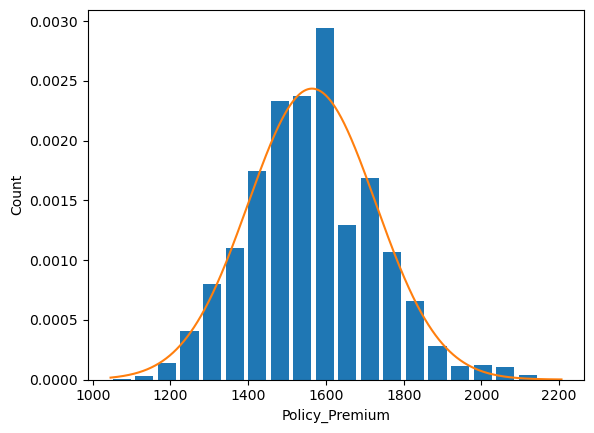

In [35]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(Auto_Claim_bk.Policy_Premium, bins=20, rwidth=0.8, density=True)
plt.xlabel('Policy_Premium')
plt.ylabel('Count')

rng = np.arange(Auto_Claim_bk.Policy_Premium.min(),Auto_Claim_bk.Policy_Premium.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Auto_Claim_bk.Policy_Premium.mean(),Auto_Claim_bk.Policy_Premium.std()))

In [36]:
# Eliminate the outlier in 'Policy_Premium' and write data to new file

In [37]:
# Calculate upper limit
Policy_Premium_UL = round(Auto_Claim_bk.Policy_Premium.mean() + 3 * Auto_Claim_bk.Policy_Premium.std(),3)
Policy_Premium_UL

2055.652

In [38]:
# Calculate Lower limit
Policy_Premium_LL = round(Auto_Claim_bk.Policy_Premium.mean() - 3 * Auto_Claim_bk.Policy_Premium.std(),3)
Policy_Premium_LL

1072.471

In [39]:
# Display the outlier in the dataset

Auto_Claim_bk[(Auto_Claim_bk.Policy_Premium > Policy_Premium_UL) & (Auto_Claim_bk.Policy_Premium > Age_LL)]

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
11,11/25/2010,VV-176196999,Car,2159.97,IA,CA,34,Male,Single,High School,Student,4,Pleasure,14523,1,1,Balanced,CL000010502,No,2/1/2016,Yes,Yes,Yes,35095.65,Datsun,23244.30,Urban,Minor,Yes
292,5/10/2019,OT-148948839,Car,2131.50,IA,CA,32,Female,Single,High School,Student,4,Pleasure,14708,1,1,Balanced,CL000005896,No,5/29/2019,Yes,Yes,Yes,34362.30,Datsun,12553.03,Semi Urban,Fatal,Yes
346,1/7/2012,SA-198386699,Car,2073.91,IA,CA,30,Male,Single,High School,Student,3,Pleasure,16084,1,1,Balanced,CL000029468,No,4/24/2018,Yes,Yes,Yes,35154.72,Datsun,23271.47,Rural,Major,Yes
509,12/20/2018,IC-193087941,Car,2066.92,IA,CA,26,Male,Single,High School,Student,4,Pleasure,14067,1,1,Balanced,CL000018922,No,2/29/2016,Yes,Yes,Yes,33970.33,Datsun,22563.36,Semi Urban,Minor,Yes
533,7/15/2019,MV-152141965,Car,2124.09,IA,CA,17,Male,Single,High School,Student,4,Pleasure,16828,1,1,Balanced,CL000025014,No,5/31/2019,Yes,Yes,Yes,32642.68,Datsun,22742.34,Urban,Major,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284555,10/2/2018,LS-125415457,Car,2111.65,IA,OR,86,Male,Divorced,PhD,Manager,72,Pleasure,31843,1,1,Enhanced,CL000009703,Yes,12/9/2018,Yes,No,No,13623.49,Bugatti,23549.75,Semi Urban,Fatal,Yes
284624,11/13/2012,OE-162929550,Car,2127.61,IA,CA,20,Male,Single,High School,Student,4,Pleasure,14850,1,1,Balanced,CL000014714,No,10/21/2019,Yes,Yes,Yes,32477.13,Datsun,22715.61,Semi Urban,Minor,Yes
284695,9/27/2017,EV-177935385,Car,2124.00,EA,AZ,46,Male,Married,PhD,Manager,60,Business,28641,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,0.00,Lamborghini,23754.53,Semi Urban,Major,No
284908,10/6/2018,TQ-145760132,Car,2087.78,IA,AZ,84,Male,Married,PhD,Manager,63,Business,24935,1,1,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Lamborghini,38482.62,Semi Urban,Major,No


In [40]:
Auto_Claim_bk.shape

(285130, 29)

In [41]:
# Eliminate the outlier and write data to new file

Auto_Claim_bk03 = Auto_Claim_bk[(Auto_Claim_bk.Policy_Premium > Policy_Premium_LL) & (Auto_Claim_bk.Policy_Premium <Policy_Premium_UL)]
Auto_Claim_bk03.shape

(283404, 29)

In [42]:
#Driving_Exp

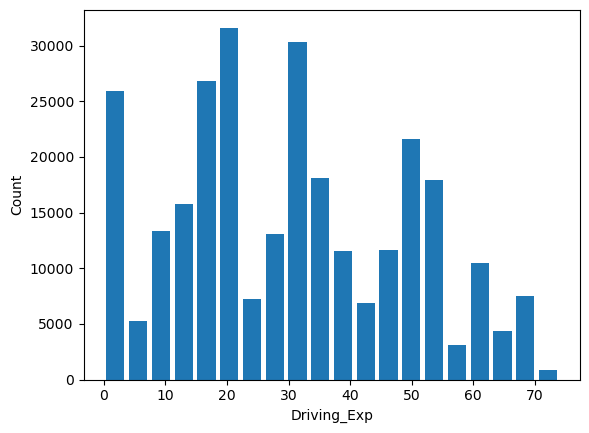

In [43]:
# Plot Histogram

plt.hist(Auto_Claim_bk03.Driving_Exp, bins=20, rwidth=0.8)
plt.xlabel('Driving_Exp')
plt.ylabel('Count')
plt.show()

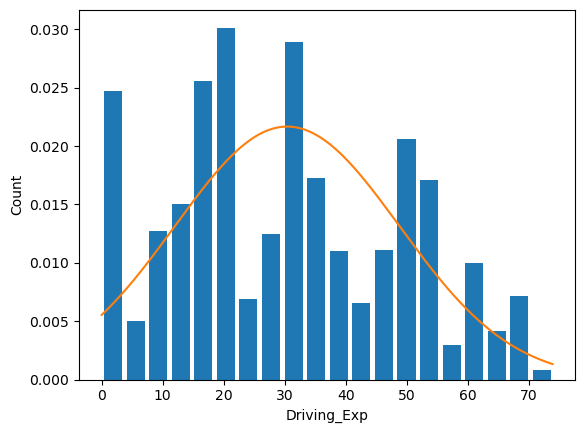

In [44]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(Auto_Claim_bk03.Driving_Exp, bins=20, rwidth=0.8, density=True)
plt.xlabel('Driving_Exp')
plt.ylabel('Count')

rng = np.arange(Auto_Claim_bk03.Driving_Exp.min(),Auto_Claim_bk03.Driving_Exp.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Auto_Claim_bk03.Driving_Exp.mean(),Auto_Claim_bk03.Driving_Exp.std()))

In [45]:
# Eliminate the outlier in 'Driving_Exp' and write data to new file

In [46]:
# Calculate upper limit
Driving_Exp_UL = round(Auto_Claim_bk03.Driving_Exp.mean() + 3 * Auto_Claim_bk03.Driving_Exp.std(),3)
Driving_Exp_UL

85.615

In [47]:
# Calculate Lower limit
Driving_Exp_LL = round(Auto_Claim_bk03.Driving_Exp.mean() - 3 * Auto_Claim_bk03.Driving_Exp.std(),3)
Driving_Exp_LL

-24.821

In [48]:
# Display the outlier in the dataset

Auto_Claim_bk03[(Auto_Claim_bk03.Driving_Exp > Driving_Exp_UL) & (Auto_Claim_bk03.Driving_Exp > Driving_Exp_LL)]

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed


In [49]:
# Eliminate the outlier and write data to new file

Auto_Claim_bk04 = Auto_Claim_bk03[(Auto_Claim_bk03.Driving_Exp > Driving_Exp_LL) & (Auto_Claim_bk03.Driving_Exp < Driving_Exp_UL)]
Auto_Claim_bk04.shape

(283404, 29)

In [50]:
#Annual_Miles

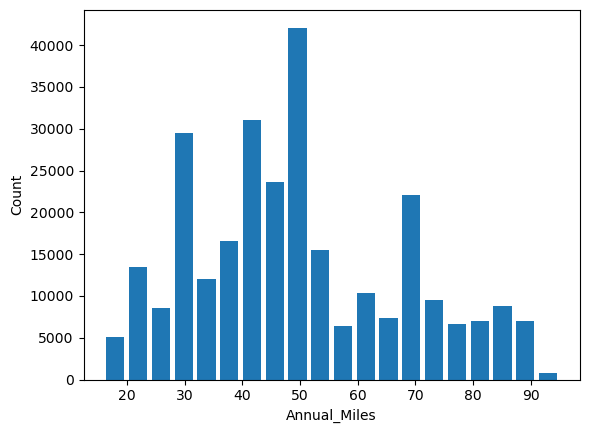

In [51]:
# Plot Histogram

plt.hist(Auto_Claim_bk04.Age, bins=20, rwidth=0.8)
plt.xlabel('Annual_Miles')
plt.ylabel('Count')
plt.show()

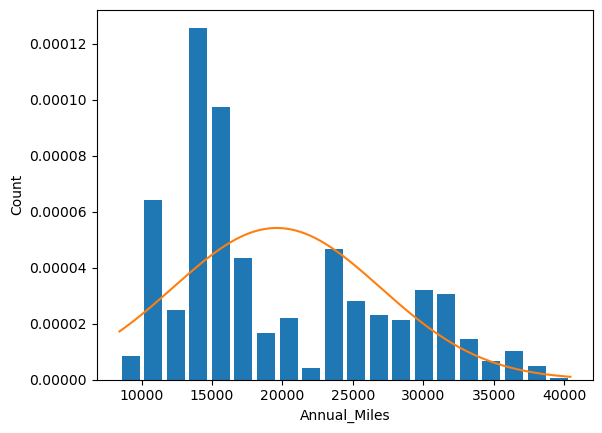

In [52]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(Auto_Claim_bk04.Annual_Miles, bins=20, rwidth=0.8, density=True)
plt.xlabel('Annual_Miles')
plt.ylabel('Count')

rng = np.arange(Auto_Claim_bk04.Annual_Miles.min(),Auto_Claim_bk04.Annual_Miles.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Auto_Claim_bk04.Annual_Miles.mean(),Auto_Claim_bk04.Annual_Miles.std()))

In [53]:
# Eliminate the outlier in 'Annual_Miles' and write data to new file

In [54]:
# Calculate upper limit
Annual_Miles_UL = round(Auto_Claim_bk04.Annual_Miles.mean() + 3 * Auto_Claim_bk04.Annual_Miles.std(),3)
Annual_Miles_UL

41696.858

In [55]:
# Calculate Lower limit
Annual_Miles_LL = round(Auto_Claim_bk04.Annual_Miles.mean() - 3 * Auto_Claim_bk04.Annual_Miles.std(),3)
Annual_Miles_LL

-2518.738

In [56]:
# Display the outlier in the dataset

Auto_Claim_bk04[(Auto_Claim_bk04.Annual_Miles > Annual_Miles_UL) & (Auto_Claim_bk04.Annual_Miles > Annual_Miles_LL)]

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed


In [57]:
# Eliminate the outlier and write data to new file

Auto_Claim_bk05 = Auto_Claim_bk04[(Auto_Claim_bk04.Annual_Miles > Annual_Miles_LL) & (Auto_Claim_bk04.Annual_Miles < Annual_Miles_UL)]
Auto_Claim_bk05.shape

(283404, 29)

In [58]:
#Previous_Citations

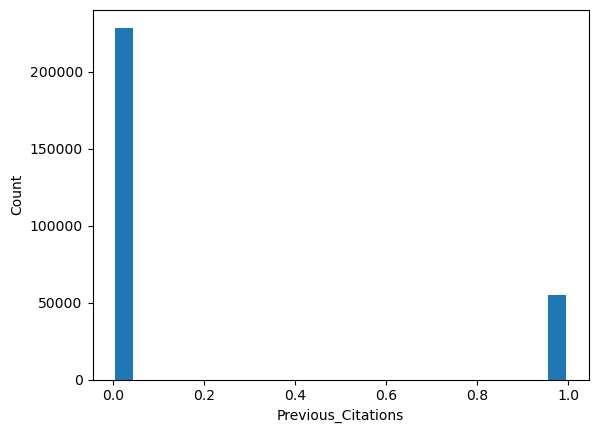

In [59]:
# Plot Histogram

plt.hist(Auto_Claim_bk05.Previous_Citations, bins=20, rwidth=0.8)
plt.xlabel('Previous_Citations')
plt.ylabel('Count')
plt.show()

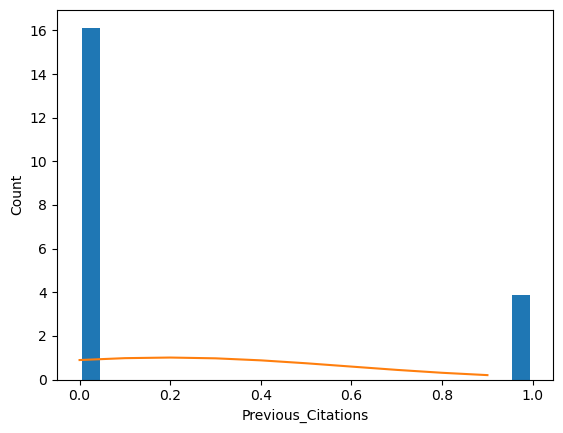

In [60]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(Auto_Claim_bk05.Previous_Citations, bins=20, rwidth=0.8, density=True)
plt.xlabel('Previous_Citations')
plt.ylabel('Count')

rng = np.arange(Auto_Claim_bk05.Previous_Citations.min(),Auto_Claim_bk05.Previous_Citations.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Auto_Claim_bk05.Previous_Citations.mean(),Auto_Claim_bk05.Previous_Citations.std()))

In [61]:
# Eliminate the outlier in 'Previous_Citations' and write data to new file

In [62]:
# Calculate upper limit
Previous_Citations_UL = round(Auto_Claim_bk05.Previous_Citations.mean() + 3 * Auto_Claim_bk05.Previous_Citations.std(),3)
Previous_Citations_UL

1.379

In [63]:
# Calculate Lower limit
Previous_Citations_LL = round(Auto_Claim_bk05.Previous_Citations.mean() - 3 * Auto_Claim_bk05.Previous_Citations.std(),3)
Previous_Citations_LL

-0.992

In [64]:
# Display the outlier in the dataset

Auto_Claim_bk05[(Auto_Claim_bk05.Previous_Citations > Previous_Citations_UL) & (Auto_Claim_bk05.Previous_Citations > Previous_Citations_LL)]

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed


In [65]:
# Eliminate the outlier and write data to new file

Auto_Claim_bk06 = Auto_Claim_bk05[(Auto_Claim_bk05.Previous_Citations > Previous_Citations_LL) & (Auto_Claim_bk05.Previous_Citations <Previous_Citations_UL)]
Auto_Claim_bk06.shape

(283404, 29)

In [66]:
#Prevous_Accidents

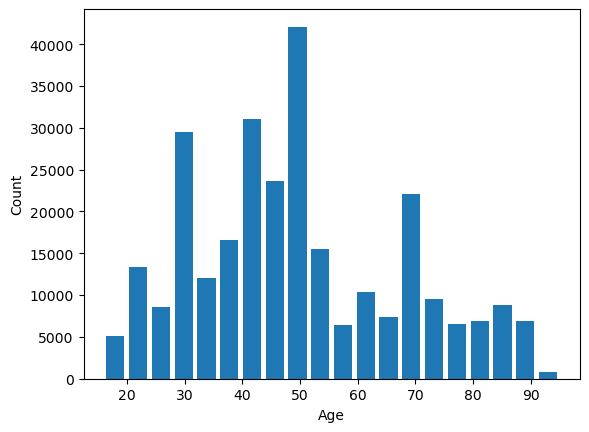

In [67]:
# Plot Histogram

plt.hist(Auto_Claim_bk06.Age, bins=20, rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

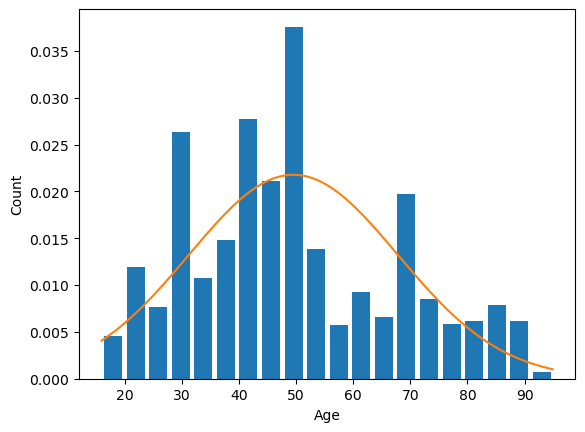

In [68]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(Auto_Claim_bk06.Age, bins=20, rwidth=0.8, density=True)
plt.xlabel('Age')
plt.ylabel('Count')

rng = np.arange(Auto_Claim_bk06.Age.min(),Auto_Claim_bk06.Age.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Auto_Claim_bk06.Age.mean(),Auto_Claim_bk06.Age.std()))

In [69]:
# Eliminate the outlier in 'Age' and write data to new file

In [70]:
# Calculate upper limit
Age_UL = round(Auto_Claim_bk06.Age.mean() + 3 * Auto_Claim_bk06.Age.std(),3)
Age_UL

104.473

In [71]:
# Calculate Lower limit
Age_LL = round(Auto_Claim_bk06.Age.mean() - 3 * Auto_Claim_bk06.Age.std(),3)
Age_LL

-5.397

In [72]:
# Display the outlier in the dataset

Auto_Claim_bk06[(Auto_Claim_bk06.Age > Age_UL) & (Auto_Claim_bk06.Age > Age_LL)]

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed


In [73]:
# Eliminate the outlier and write data to new file

Auto_Claim_bk07 = Auto_Claim_bk06[(Auto_Claim_bk06.Age > Age_LL) & (Auto_Claim_bk06.Age <Age_UL)]
Auto_Claim_bk07.shape

(283404, 29)

In [74]:
#Claim_Paid_Out

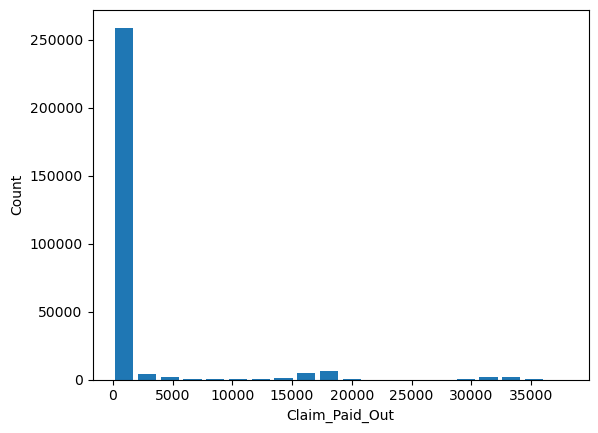

In [75]:
# Plot Histogram

plt.hist(Auto_Claim_bk07.Claim_Paid_Out, bins=20, rwidth=0.8)
plt.xlabel('Claim_Paid_Out')
plt.ylabel('Count')
plt.show()

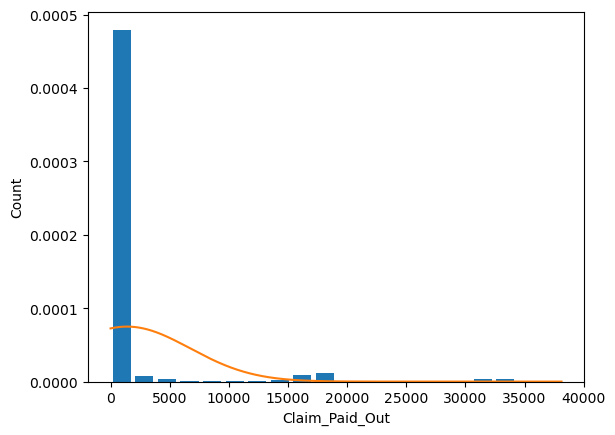

In [76]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(Auto_Claim_bk07.Claim_Paid_Out, bins=20, rwidth=0.8, density=True)
plt.xlabel('Claim_Paid_Out')
plt.ylabel('Count')

rng = np.arange(Auto_Claim_bk07.Claim_Paid_Out.min(),Auto_Claim_bk07.Claim_Paid_Out.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Auto_Claim_bk07.Claim_Paid_Out.mean(),Auto_Claim_bk07.Claim_Paid_Out.std()))

In [77]:
# Eliminate the outlier in 'Claim_Paid_Out' and write data to new file

In [78]:
# Calculate upper limit
Claim_Paid_Out_UL = round(Auto_Claim_bk07.Claim_Paid_Out.mean() + 3 * Auto_Claim_bk07.Claim_Paid_Out.std(),3)
Claim_Paid_Out_UL

17354.808

In [79]:
# Calculate Lower limit
Claim_Paid_Out_LL = round(Auto_Claim_bk07.Claim_Paid_Out.mean() - 3 * Auto_Claim_bk07.Claim_Paid_Out.std(),3)
Claim_Paid_Out_LL

-14586.353

In [80]:
# Display the outlier in the dataset

Auto_Claim_bk07[(Auto_Claim_bk07.Claim_Paid_Out > Claim_Paid_Out_UL) & (Auto_Claim_bk07.Claim_Paid_Out > Claim_Paid_Out_LL)]

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
1,4/8/2018,BI-158124192,Car,1587.37,EA,OR,29,Female,Married,Masters,ITENGINEER,18,Pleasure,10875,1,0,Basic,CL000026353,Yes,3/22/2018,Yes,No,No,18623.00,BMW,23710.32,Rural,Major,Yes
37,12/17/2017,ZK-134785420,Van,1797.54,EA,NV,40,Male,Single,High School,driver,17,Pleasure,11725,1,1,Balanced,CL000027612,No,4/11/2016,Yes,Yes,Yes,18831.12,Datsun,72437.88,Semi Urban,Major,Yes
84,1/25/2020,PD-167562758,Truck,1726.14,EA,CA,42,Female,Single,Masters,Engineer,19,Commute,18238,1,1,Balanced,CL000028836,No,7/9/2018,Yes,No,Yes,33899.06,Nissan,36255.70,Semi Urban,Major,Yes
143,10/16/2013,ZZ-138299232,Car,1653.05,EA,OR,20,Male,Single,High School,Student,2,Pleasure,11354,1,1,Basic,CL000001696,Yes,5/28/2019,Yes,No,No,19128.27,BMW,22885.36,Urban,Fatal,Yes
153,8/3/2015,CV-128502490,Car,1835.20,IA,AZ,87,Male,Single,High School,Student,71,Pleasure,17037,1,1,Balanced,CL000029462,No,4/28/2017,Yes,Yes,Yes,33777.70,Datsun,23931.39,Country side,Fatal,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284963,10/16/2018,AW-160550029,Car,1469.28,EA,OR,50,Male,Married,Bachelors,Engineer,15,Pleasure,33040,1,1,Balanced,CL000010183,Yes,6/6/2018,Yes,No,No,18147.68,BMW,23337.92,Semi Urban,Major,Yes
284977,5/26/2016,YJ-160524424,Car,1444.63,EA,CA,29,Female,Single,Bachelors,Engineer,3,Pleasure,27415,1,1,Balanced,CL000019235,No,10/20/2018,Yes,No,No,18536.59,Nissan,23845.36,Country side,Minor,Yes
285049,4/23/2014,SV-182645089,Car,1721.38,IA,CA,30,Male,Single,High School,Student,20,Pleasure,16914,0,1,Balanced,CL000007775,No,11/8/2015,Yes,Yes,Yes,31160.18,Honda,32866.17,Urban,Major,Yes
285051,3/28/2012,PY-150977008,Car,2034.81,IA,CA,20,Male,Single,High School,Student,5,Pleasure,18051,1,1,Balanced,CL000008192,No,5/13/2019,Yes,Yes,Yes,34632.82,Datsun,23559.74,Semi Urban,Minor,Yes


In [81]:
# Eliminate the outlier and write data to new file

Auto_Claim_bk08 = Auto_Claim_bk07[(Auto_Claim_bk07.Claim_Paid_Out > Claim_Paid_Out_LL) & (Auto_Claim_bk07.Claim_Paid_Out < Claim_Paid_Out_UL)]
Auto_Claim_bk08.shape

(272905, 29)

In [82]:
#Vehicle_Cost

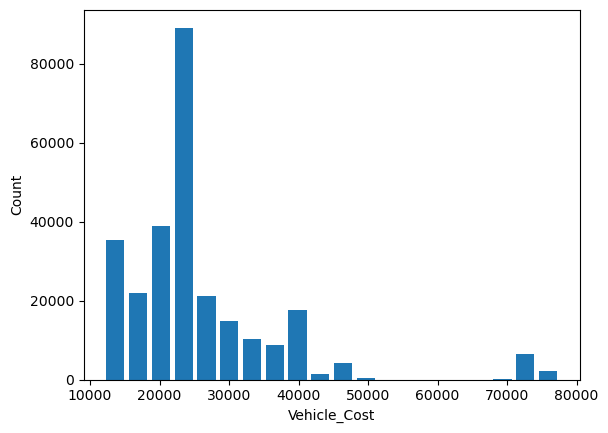

In [83]:
# Plot Histogram

plt.hist(Auto_Claim_bk08.Vehicle_Cost, bins=20, rwidth=0.8)
plt.xlabel('Vehicle_Cost')
plt.ylabel('Count')
plt.show()

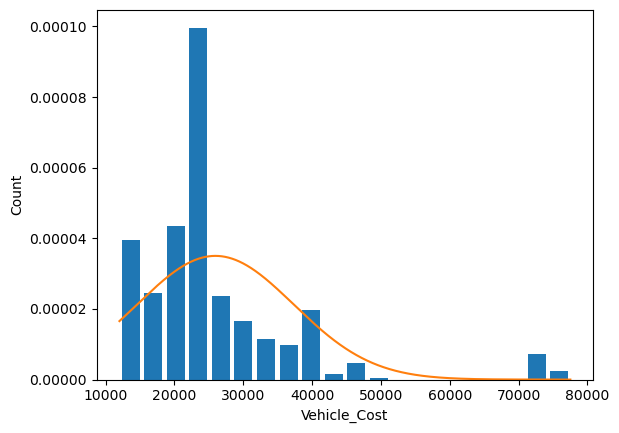

In [84]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(Auto_Claim_bk08.Vehicle_Cost, bins=20, rwidth=0.8, density=True)
plt.xlabel('Vehicle_Cost')
plt.ylabel('Count')

rng = np.arange(Auto_Claim_bk08.Vehicle_Cost.min(),Auto_Claim_bk08.Vehicle_Cost.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Auto_Claim_bk08.Vehicle_Cost.mean(),Auto_Claim_bk08.Vehicle_Cost.std()))

In [85]:
# Eliminate the outlier in 'Vehicle_Cost' and write data to new file

In [86]:
# Calculate upper limit
Vehicle_Cost_UL = round(Auto_Claim_bk08.Vehicle_Cost.mean() + 3 * Auto_Claim_bk08.Vehicle_Cost.std(),3)
Vehicle_Cost_UL

60108.493

In [87]:
# Calculate Lower limit
Vehicle_Cost_LL = round(Auto_Claim_bk08.Vehicle_Cost.mean() - 3 * Auto_Claim_bk08.Vehicle_Cost.std(),3)
Vehicle_Cost_LL

-8219.299

In [88]:
# Display the outlier in the dataset

Auto_Claim_bk08[(Auto_Claim_bk08.Vehicle_Cost >Vehicle_Cost_UL) & (Auto_Claim_bk08.Vehicle_Cost > Vehicle_Cost_LL)]

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
14,6/4/2019,JQ-180674493,Van,1201.31,EA,CA,38,Female,Married,High School,driver,22,Pleasure,23599,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Hyundai,72748.62,Semi Urban,Major,No
22,1/14/2017,GH-139511471,Truck,1404.01,IA,NV,37,Female,Single,Bachelors,Architect,9,Pleasure,23712,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,14.28,GM,75136.23,Semi Urban,Major,No
46,7/5/2017,FB-195017518,Truck,1379.87,IA,NV,47,Male,Married,High School,Carpenter,29,Pleasure,16114,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Dodge,75017.11,Semi Urban,Major,No
52,9/5/2016,HY-187724346,Van,1568.75,EA,OR,39,Male,Married,PhD,CEO,19,Pleasure,16361,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Lincoln,73963.94,Semi Urban,Major,No
80,2/28/2017,ZG-182671956,Van,1899.32,EA,NV,39,Female,Married,High School,driver,14,Pleasure,11269,0,1,Basic,CL000005818,Yes,10/24/2015,Yes,No,Yes,12990.74,BMW,73793.38,Country side,Major,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284966,1/21/2016,RX-147294712,Car,1794.64,IA,AZ,82,Female,Married,PhD,Engineer,49,Pleasure,23429,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Ford,73943.26,Semi Urban,Major,No
284970,7/12/2018,FE-196906433,Truck,1569.90,IA,CA,27,Female,Single,Bachelors,ITENGINEER,13,Pleasure,14290,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Chevrolet,72917.45,Semi Urban,Major,No
284975,1/10/2012,JI-151961185,Truck,1703.35,EA,CA,43,Female,Married,Masters,Engineer,14,Pleasure,16739,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,GM,73424.90,Semi Urban,Major,No
284980,6/7/2016,HQ-144151466,Car,1725.53,IA,OR,55,Female,Married,Masters,Engineer,38,Pleasure,16816,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,0.00,Ferrari,72684.49,Semi Urban,Major,No


In [89]:
# Eliminate the outlier and write data to new file

Auto_Claim_new = Auto_Claim_bk08[(Auto_Claim_bk08.Vehicle_Cost > Vehicle_Cost_LL) & (Auto_Claim_bk08.Vehicle_Cost <Vehicle_Cost_UL)]
Auto_Claim_new.shape

(264339, 29)

In [90]:
#STEP-4:CATEGORICAL DATA AND ENCODING TECHNIQUES

In [91]:
Auto_Claim_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264339 entries, 0 to 285129
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Inception_Date      264339 non-null  object 
 1   Policy_Number       264339 non-null  object 
 2   Policy_Type         264339 non-null  object 
 3   Policy_Premium      264339 non-null  float64
 4   Channel             264339 non-null  object 
 5   State               264339 non-null  object 
 6   Age                 264339 non-null  int64  
 7   Gender              264339 non-null  object 
 8   Marital_Status      264339 non-null  object 
 9   Education           264339 non-null  object 
 10  Profession          264339 non-null  object 
 11  Driving_Exp         264339 non-null  int64  
 12  Vehicle_Usage       264339 non-null  object 
 13  Annual_Miles        264339 non-null  int64  
 14  Previous_Citations  264339 non-null  int64  
 15  Prevous_Accidents   264339 non-nul

In [92]:
# Display unique values counts for each variable

Auto_Claim_new.nunique()

Inception_Date          2781
Policy_Number          26292
Policy_Type                3
Policy_Premium         66517
Channel                    2
State                      4
Age                       80
Gender                     2
Marital_Status             4
Education                  4
Profession                17
Driving_Exp               75
Vehicle_Usage              3
Annual_Miles           27216
Previous_Citations         2
Prevous_Accidents          3
Coverage_Type              3
Claim_Number            2790
Umbrella_Policy            2
Accident_Date           1561
Police_File                2
Any_Eye_Witness            2
Hired_Attorney             2
Claim_Paid_Out         17287
Make                      24
Vehicle_Cost          239742
Road_Type                  4
Accident_Severity          3
Claimed                    2
dtype: int64

In [93]:
# Display the data by variables wise

for i in Auto_Claim_new.columns:
    print(Auto_Claim_new[i].value_counts())

4/4/2017      691
12/27/2016    413
4/13/2017     410
7/5/2017      406
7/5/2016      405
             ... 
3/13/2013       1
4/27/2013       1
2/14/2011       1
7/2/2013        1
10/6/2012       1
Name: Inception_Date, Length: 2781, dtype: int64
AZ-178535846    130
GF-181689399    116
AQ-198523899    106
QR-144419327    103
CA-127708890    102
               ... 
TI-192031195      1
EM-182317683      1
GF-137738781      1
OC-131759234      1
EM-184825021      1
Name: Policy_Number, Length: 26292, dtype: int64
Car      174067
Truck     45247
Van       45025
Name: Policy_Type, dtype: int64
1597.59    21
1606.85    20
1589.81    20
1579.33    20
1587.09    19
           ..
1809.99     1
2006.36     1
1789.23     1
1333.73     1
1916.99     1
Name: Policy_Premium, Length: 66517, dtype: int64
EA    154617
IA    109722
Name: Channel, dtype: int64
CA    112762
OR     56324
AZ     49200
NV     46053
Name: State, dtype: int64
51    17117
50    11844
52     8458
41     7884
40     7679
      ..

In [94]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,11/4/2019,VJ-130653912,Van,1176.40,EA,CA,63,Male,Married,PhD,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,8/3/2015,DZ-175413016,Car,1268.38,IA,OR,66,Male,Married,High School,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,6/8/2015,QX-179005448,Car,1921.00,IA,AZ,89,Male,Divorced,PhD,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,1/4/2018,KM-194622292,Car,1582.98,EA,NV,69,Male,Married,High School,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,1/1/2017,GD-196560923,Van,1548.93,EA,CA,33,Male,Single,Bachelors,Teacher,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [95]:
# Identify the numerical and categorical variables

num_vars = Auto_Claim_new.columns[Auto_Claim_new.dtypes != 'object']
cat_vars = Auto_Claim_new.columns[Auto_Claim_new.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['Policy_Premium', 'Age', 'Driving_Exp', 'Annual_Miles',
       'Previous_Citations', 'Prevous_Accidents', 'Claim_Paid_Out',
       'Vehicle_Cost'],
      dtype='object')
Index(['Inception_Date', 'Policy_Number', 'Policy_Type', 'Channel', 'State',
       'Gender', 'Marital_Status', 'Education', 'Profession', 'Vehicle_Usage',
       'Coverage_Type', 'Claim_Number', 'Umbrella_Policy', 'Accident_Date',
       'Police_File', 'Any_Eye_Witness', 'Hired_Attorney', 'Make', 'Road_Type',
       'Accident_Severity', 'Claimed'],
      dtype='object')


In [96]:
# Display 'Inception_Date' categorical variable 

Auto_Claim_new['Inception_Date'].value_counts()

4/4/2017      691
12/27/2016    413
4/13/2017     410
7/5/2017      406
7/5/2016      405
             ... 
3/13/2013       1
4/27/2013       1
2/14/2011       1
7/2/2013        1
10/6/2012       1
Name: Inception_Date, Length: 2781, dtype: int64

In [97]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['Inception_Date'] = LE.fit_transform(Auto_Claim_new[['Inception_Date']])

In [98]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,VJ-130653912,Van,1176.40,EA,CA,63,Male,Married,PhD,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,DZ-175413016,Car,1268.38,IA,OR,66,Male,Married,High School,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,QX-179005448,Car,1921.00,IA,AZ,89,Male,Divorced,PhD,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,KM-194622292,Car,1582.98,EA,NV,69,Male,Married,High School,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,GD-196560923,Van,1548.93,EA,CA,33,Male,Single,Bachelors,Teacher,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [99]:
# Display 'Inception_Date' categorical variable 

Auto_Claim_new['Inception_Date'].value_counts()

1602    691
888     413
1454    410
2292    406
2291    405
       ... 
1218      1
1563      1
1018      1
2186      1
459       1
Name: Inception_Date, Length: 2781, dtype: int64

In [100]:
#Policy_Number

In [101]:
# Display 'Policy_Number' categorical variable 

Auto_Claim_new['Policy_Number'].value_counts()

AZ-178535846    130
GF-181689399    116
AQ-198523899    106
QR-144419327    103
CA-127708890    102
               ... 
TI-192031195      1
EM-182317683      1
GF-137738781      1
OC-131759234      1
EM-184825021      1
Name: Policy_Number, Length: 26292, dtype: int64

In [102]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['Policy_Number'] = LE.fit_transform(Auto_Claim_new[['Policy_Number']])

In [103]:
# Display 'Policy_Number' categorical variable 

Auto_Claim_new['Policy_Number'].value_counts()

1001     130
6273     116
655      106
16899    103
2057     102
        ... 
19523      1
4608       1
6255       1
14264      1
4610       1
Name: Policy_Number, Length: 26292, dtype: int64

In [104]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,Van,1176.40,EA,CA,63,Male,Married,PhD,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,Car,1268.38,IA,OR,66,Male,Married,High School,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,Car,1921.00,IA,AZ,89,Male,Divorced,PhD,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,Car,1582.98,EA,NV,69,Male,Married,High School,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,Van,1548.93,EA,CA,33,Male,Single,Bachelors,Teacher,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [105]:
#Policy_Type

In [106]:
# Display 'Policy_Type' categorical variable 

Auto_Claim_new['Policy_Type'].value_counts()

Car      174067
Truck     45247
Van       45025
Name: Policy_Type, dtype: int64

In [107]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['Policy_Type'] = LE.fit_transform(Auto_Claim_new[['Policy_Type']])

In [108]:
# Display 'Policy_Type' categorical variable 

Auto_Claim_new['Policy_Type'].value_counts()

0    174067
1     45247
2     45025
Name: Policy_Type, dtype: int64

In [109]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,EA,CA,63,Male,Married,PhD,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,IA,OR,66,Male,Married,High School,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,IA,AZ,89,Male,Divorced,PhD,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,EA,NV,69,Male,Married,High School,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,EA,CA,33,Male,Single,Bachelors,Teacher,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [110]:
#Channel

In [111]:
# Display 'Channel' categorical variable 

Auto_Claim_new['Channel'].value_counts()

EA    154617
IA    109722
Name: Channel, dtype: int64

In [112]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['Channel'] = LE.fit_transform(Auto_Claim_new[['Channel']])

In [113]:
# Display 'Policy_Number' categorical variable 

Auto_Claim_new['Channel'].value_counts()

0    154617
1    109722
Name: Channel, dtype: int64

In [114]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,CA,63,Male,Married,PhD,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,OR,66,Male,Married,High School,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,AZ,89,Male,Divorced,PhD,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,NV,69,Male,Married,High School,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,CA,33,Male,Single,Bachelors,Teacher,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [115]:
#State    

In [116]:
# Display 'State' categorical variable 

Auto_Claim_new['State'].value_counts()

CA    112762
OR     56324
AZ     49200
NV     46053
Name: State, dtype: int64

In [117]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['State'] = LE.fit_transform(Auto_Claim_new[['State']])

In [118]:
# Display 'State' categorical variable 

Auto_Claim_new['State'].value_counts()

1    112762
3     56324
0     49200
2     46053
Name: State, dtype: int64

In [119]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,Male,Married,PhD,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,Male,Married,High School,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,Male,Divorced,PhD,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,Male,Married,High School,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,Male,Single,Bachelors,Teacher,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [120]:
#Gender

In [121]:
# Display 'Gender' categorical variable 

Auto_Claim_new['Gender'].value_counts()

Male      167359
Female     96980
Name: Gender, dtype: int64

In [122]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['Gender'] = LE.fit_transform(Auto_Claim_new[['Gender']])

In [123]:
# Display 'Gender' categorical variable 

Auto_Claim_new['Gender'].value_counts()

1    167359
0     96980
Name: Gender, dtype: int64

In [124]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,Married,PhD,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,Married,High School,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,Divorced,PhD,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,Married,High School,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,Single,Bachelors,Teacher,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [125]:
#Marital_Status

In [126]:
# Display 'Marital_Status' categorical variable 

Auto_Claim_new['Marital_Status'].value_counts()

Married     186927
Single       60713
Divorced     10464
Widow         6235
Name: Marital_Status, dtype: int64

In [127]:
# Replace variable 'Marital_Status', and convert the 'Marital_Status' to integer value.

Auto_Claim_new['Marital_Status'] = Auto_Claim_new['Marital_Status'].str.replace('Single', '1')
Auto_Claim_new['Marital_Status'] = Auto_Claim_new['Marital_Status'].str.replace('Married', '4')
Auto_Claim_new['Marital_Status'] = Auto_Claim_new['Marital_Status'].str.replace('Divorced', '2')
Auto_Claim_new['Marital_Status'] = Auto_Claim_new['Marital_Status'].str.replace('Widow', '3')
Auto_Claim_new['Marital_Status'] = Auto_Claim_new['Marital_Status'].astype(int)

In [128]:
# Display 'Marital_Status' categorical variable 

Auto_Claim_new['Marital_Status'].value_counts()

4    186927
1     60713
2     10464
3      6235
Name: Marital_Status, dtype: int64

In [129]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,PhD,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,High School,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,PhD,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,High School,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,Bachelors,Teacher,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [130]:
#Education

In [131]:
# Display 'Education' categorical variable 

Auto_Claim_new['Education'].value_counts()

High School    96792
Bachelors      67640
Masters        64411
PhD            35496
Name: Education, dtype: int64

In [132]:
# Replace the variable 'education', convert the 'education' to integer value.

Auto_Claim_new['Education'] = Auto_Claim_new['Education'].str.replace('High School', '1')
Auto_Claim_new['Education'] = Auto_Claim_new['Education'].str.replace('Bachelors', '2')
Auto_Claim_new['Education'] = Auto_Claim_new['Education'].str.replace('Masters', '3')
Auto_Claim_new['Education'] = Auto_Claim_new['Education'].str.replace('PhD', '4')
Auto_Claim_new['Education'] = Auto_Claim_new['Education'].astype(int)

In [133]:
# Display 'Education' categorical variable 

Auto_Claim_new['Education'].value_counts()

1    96792
2    67640
3    64411
4    35496
Name: Education, dtype: int64

In [134]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,CEO,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,Carpenter,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,Manager,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,Carpenter,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,Teacher,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [135]:
#Profession

In [136]:
# Display 'Profession' categorical variable 

Auto_Claim_new['Profession'].value_counts()

Engineer      81135
Carpenter     39604
ITENGINEER    17392
Student       15687
Manager       15608
Arts          13742
CEO           10944
Architect     10396
Worker        10267
driver         9582
Artist         9231
painter        9123
Professor      8467
Teacher        7485
Lawyer         5019
HR              335
Lecturer        322
Name: Profession, dtype: int64

In [137]:
# Replace 'Profession' variable, and convert the 'Profession' to integer value.

Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Student', '0')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('driver', '1')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('painter', '1')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Artist', '1')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Worker', '2')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Carpenter', '2')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Teacher', '3')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Lecturer', '3')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Professor', '3')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Arts', '4')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Lawyer', '5')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Architect', '6')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Engineer', '7')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('ITENGINEER', '7')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('HR', '8')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('Manager', '8')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].str.replace('CEO', '9')
Auto_Claim_new['Profession'] = Auto_Claim_new['Profession'].astype(int)

In [138]:
# Display 'Profession' categorical variable 

Auto_Claim_new['Profession'].value_counts()

7    98527
2    49871
1    27936
3    16274
8    15943
0    15687
4    13742
9    10944
6    10396
5     5019
Name: Profession, dtype: int64

In [139]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,Business,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,Business,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,Business,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,Commute,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,Pleasure,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [140]:
#Vehicle_Usage

In [141]:
# Display 'Vehicle_Usage' categorical variable 

Auto_Claim_new['Vehicle_Usage'].value_counts()

Pleasure    136733
Business     79463
Commute      48143
Name: Vehicle_Usage, dtype: int64

In [142]:
# Replace 'Vehicle_Usage' variable, and convert the 'Vehicle_Usage' to integer value.

Auto_Claim_new['Vehicle_Usage'] = Auto_Claim_new['Vehicle_Usage'].str.replace('Commute', '0')
Auto_Claim_new['Vehicle_Usage'] = Auto_Claim_new['Vehicle_Usage'].str.replace('Business', '1')
Auto_Claim_new['Vehicle_Usage'] = Auto_Claim_new['Vehicle_Usage'].str.replace('Pleasure', '2')
Auto_Claim_new['Vehicle_Usage'] = Auto_Claim_new['Vehicle_Usage'].astype(int)

In [143]:
# Display 'Vehicle_Usage' categorical variable 

Auto_Claim_new['Vehicle_Usage'].value_counts()

2    136733
1     79463
0     48143
Name: Vehicle_Usage, dtype: int64

In [144]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,Enhanced,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [145]:
#Coverage_Type

In [146]:
# Display 'Coverage_Type' categorical variable 

Auto_Claim_new['Coverage_Type'].value_counts()

Balanced    120985
Enhanced     92116
Basic        51238
Name: Coverage_Type, dtype: int64

In [147]:
# Replace 'Coverage_Type' variable, and convert the 'Coverage_Type' to integer value.

Auto_Claim_new['Coverage_Type'] = Auto_Claim_new['Coverage_Type'].str.replace('Basic', '0')
Auto_Claim_new['Coverage_Type'] = Auto_Claim_new['Coverage_Type'].str.replace('Balanced', '1')
Auto_Claim_new['Coverage_Type'] = Auto_Claim_new['Coverage_Type'].str.replace('Enhanced', '2')
Auto_Claim_new['Coverage_Type'] = Auto_Claim_new['Coverage_Type'].astype(int)

In [148]:
# Display 'Coverage_Type' categorical variable 

Auto_Claim_new['Coverage_Type'].value_counts()

1    120985
2     92116
0     51238
Name: Coverage_Type, dtype: int64

In [149]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,CL144120603,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,CL144120603,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,CL144120603,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [150]:
#Claim_Number

In [151]:
# Display 'Claim_Number' categorical variable 

Auto_Claim_new['Claim_Number'].value_counts()

CL144120603    247347
CL000028821      1454
CL121001407       668
CL000016606       503
CL000001742       406
                ...  
CL000019047         1
CL000026378         1
CL000027463         1
CL000013792         1
CL000024661         1
Name: Claim_Number, Length: 2790, dtype: int64

In [152]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['Claim_Number'] = LE.fit_transform(Auto_Claim_new[['Claim_Number']])

In [153]:
# Display 'Claim_Number' categorical variable 

Auto_Claim_new['Claim_Number'].value_counts()

2789    247347
2556      1454
2726       668
1475       503
166        406
         ...  
1679         1
2326         1
2424         1
1229         1
2169         1
Name: Claim_Number, Length: 2790, dtype: int64

In [154]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,Yes,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,No,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,No,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,No,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,No,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [155]:
#Umbrella_Policy

In [156]:
# Display 'Umbrella_Policy' categorical variable 

Auto_Claim_new['Umbrella_Policy'].value_counts()

No     238653
Yes     25686
Name: Umbrella_Policy, dtype: int64

In [157]:
# Replace 'Umbrella_Policy' variable, and convert the 'Umbrella_Policy' to integer value.

Auto_Claim_new['Umbrella_Policy'] = Auto_Claim_new['Umbrella_Policy'].str.replace('No', '0')
Auto_Claim_new['Umbrella_Policy'] = Auto_Claim_new['Umbrella_Policy'].str.replace('Yes', '1')
Auto_Claim_new['Umbrella_Policy'] = Auto_Claim_new['Umbrella_Policy'].astype(int)

In [158]:
# Display 'Umbrella_Policy' categorical variable 

Auto_Claim_new['Umbrella_Policy'].value_counts()

0    238653
1     25686
Name: Umbrella_Policy, dtype: int64

In [159]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,1/2/2019,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,1/2/2019,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,9/30/2018,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,9/30/2018,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,1/2/2019,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [160]:
#Accident_Date

In [161]:
# Display 'Accident_Date' categorical variable 

Auto_Claim_new['Accident_Date'].value_counts()

9/30/2018     124581
1/2/2019      124441
12/16/2018       476
2/11/2020        141
5/3/2019         126
               ...  
4/10/2015          1
8/8/2014           1
7/3/2017           1
8/15/2014          1
8/31/2014          1
Name: Accident_Date, Length: 1561, dtype: int64

In [162]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['Accident_Date'] = LE.fit_transform(Auto_Claim_new[['Accident_Date']])

In [163]:
# Display 'Accident_Date' categorical variable 

Auto_Claim_new['Accident_Date'].value_counts()

1536    124581
53      124441
431        476
534        141
1023       126
         ...  
792          1
1427         1
1262         1
1323         1
1406         1
Name: Accident_Date, Length: 1561, dtype: int64

In [164]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,No,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,No,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,No,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,No,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,No,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [165]:
#Police_File

In [166]:
# Display 'Police_File' categorical variable 

Auto_Claim_new['Police_File'].value_counts()

No     248877
Yes     15462
Name: Police_File, dtype: int64

In [167]:
# Replace 'Police_File' variable, and convert the 'Police_File' to integer value.

Auto_Claim_new['Police_File'] = Auto_Claim_new['Police_File'].str.replace('No', '0')
Auto_Claim_new['Police_File'] = Auto_Claim_new['Police_File'].str.replace('Yes', '1')
Auto_Claim_new['Police_File'] = Auto_Claim_new['Police_File'].astype(int)

In [168]:
# Display 'Police_File' categorical variable 

Auto_Claim_new['Police_File'].value_counts()

0    248877
1     15462
Name: Police_File, dtype: int64

In [169]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,No,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,No,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,No,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,No,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,No,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [170]:
#Any_Eye_Witness

In [171]:
# Display 'Any_Eye_Witness' categorical variable 

Auto_Claim_new['Any_Eye_Witness'].value_counts()

No     259086
Yes      5253
Name: Any_Eye_Witness, dtype: int64

In [172]:
# Replace 'Any_Eye_Witness' variable, and convert the 'Any_Eye_Witness' to integer value.

Auto_Claim_new['Any_Eye_Witness'] = Auto_Claim_new['Any_Eye_Witness'].str.replace('No', '0')
Auto_Claim_new['Any_Eye_Witness'] = Auto_Claim_new['Any_Eye_Witness'].str.replace('Yes', '1')
Auto_Claim_new['Any_Eye_Witness'] = Auto_Claim_new['Any_Eye_Witness'].astype(int)

In [173]:
# Display 'Any_Eye_Witness' categorical variable 

Auto_Claim_new['Any_Eye_Witness'].value_counts()

0    259086
1      5253
Name: Any_Eye_Witness, dtype: int64

In [174]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,0,No,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,0,No,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,0,No,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,0,No,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,0,No,0.00,Honda,25434.74,Semi Urban,Major,No


In [175]:
#Hired_Attorney

In [176]:
# Display 'Hired_Attorney' categorical variable 

Auto_Claim_new['Hired_Attorney'].value_counts()

No     253368
Yes     10971
Name: Hired_Attorney, dtype: int64

In [177]:
# Replace 'Hired_Attorney' variable, and convert the 'Hired_Attorney' to integer value.

Auto_Claim_new['Hired_Attorney'] = Auto_Claim_new['Hired_Attorney'].str.replace('No', '0')
Auto_Claim_new['Hired_Attorney'] = Auto_Claim_new['Hired_Attorney'].str.replace('Yes', '1')
Auto_Claim_new['Hired_Attorney'] = Auto_Claim_new['Hired_Attorney'].astype(int)

In [178]:
# Display 'Hired_Attorney' categorical variable 

Auto_Claim_new['Hired_Attorney'].value_counts()

0    253368
1     10971
Name: Hired_Attorney, dtype: int64

In [179]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,0,0,0.00,Kia,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,0,0,0.00,Honda,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,0,0,0.00,Mercedes,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,0,0,0.48,Kia,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,0,0,0.00,Honda,25434.74,Semi Urban,Major,No


In [180]:
#Make

In [181]:
# Display 'Make' categorical variable 

Auto_Claim_new['Make'].value_counts()

Chevrolet      40294
Honda          30729
Hyundai        23595
Ford           22579
GM             15960
Dodge          14769
Lincoln        13613
Volvo          12818
Chrysler       10996
Toyota         10149
Mercedes       10079
Cadillac        9788
Bugatti         8627
Nissan          8207
Datsun          8039
Ferrari         7149
BMW             5262
Kia             4700
Lamborghini     3527
Alpha Romeo     1729
Audi             753
Bentley          554
Isuzu            388
Skoda             35
Name: Make, dtype: int64

In [182]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

Auto_Claim_new['Make'] = LE.fit_transform(Auto_Claim_new[['Make']])

In [183]:
# Display 'Make' categorical variable 

Auto_Claim_new['Make'].value_counts()

6     40294
13    30729
14    23595
11    22579
12    15960
9     14769
18    13613
23    12818
7     10996
22    10149
19    10079
5      9788
4      8627
20     8207
8      8039
10     7149
2      5262
16     4700
17     3527
0      1729
1       753
3       554
15      388
21       35
Name: Make, dtype: int64

In [184]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,0,0,0.00,16,24219.20,Semi Urban,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,0,0,0.00,13,23766.13,Semi Urban,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,0,0,0.00,19,26992.05,Semi Urban,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,0,0,0.48,16,46506.75,Semi Urban,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,0,0,0.00,13,25434.74,Semi Urban,Major,No


In [185]:
#Road_Type

In [186]:
# Display 'Road_Type' categorical variable 

Auto_Claim_new['Road_Type'].value_counts()

Semi Urban      252794
Urban             4254
Rural             3846
Country side      3445
Name: Road_Type, dtype: int64

In [187]:
# Replace 'Road_Type' variable, and convert the 'Road_Type' to integer value.

Auto_Claim_new['Road_Type'] = Auto_Claim_new['Road_Type'].str.replace('Rural', '0')
Auto_Claim_new['Road_Type'] = Auto_Claim_new['Road_Type'].str.replace('Country side', '1')
Auto_Claim_new['Road_Type'] = Auto_Claim_new['Road_Type'].str.replace('Semi Urban', '2')
Auto_Claim_new['Road_Type'] = Auto_Claim_new['Road_Type'].str.replace('Urban', '3')
Auto_Claim_new['Road_Type'] = Auto_Claim_new['Road_Type'].astype(int)

In [188]:
# Display 'Road_Type' categorical variable 

Auto_Claim_new['Road_Type'].value_counts()

2    252794
3      4254
0      3846
1      3445
Name: Road_Type, dtype: int64

In [189]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,0,0,0.00,16,24219.20,2,Major,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,0,0,0.00,13,23766.13,2,Major,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,0,0,0.00,19,26992.05,2,Major,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,0,0,0.48,16,46506.75,2,Major,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,0,0,0.00,13,25434.74,2,Major,No


In [190]:
#Accident_Severity

In [191]:
# Display 'Accident_Severity' categorical variable 

Auto_Claim_new['Accident_Severity'].value_counts()

Major    255440
Minor      5052
Fatal      3847
Name: Accident_Severity, dtype: int64

In [192]:
# Replace 'Accident_Severity' variable, and convert the 'Accident_Severity' to integer value.

Auto_Claim_new['Accident_Severity'] = Auto_Claim_new['Accident_Severity'].str.replace('Minor', '0')
Auto_Claim_new['Accident_Severity'] = Auto_Claim_new['Accident_Severity'].str.replace('Major', '1')
Auto_Claim_new['Accident_Severity'] = Auto_Claim_new['Accident_Severity'].str.replace('Fatal', '2')
Auto_Claim_new['Accident_Severity'] = Auto_Claim_new['Accident_Severity'].astype(int)

In [193]:
# Display 'Accident_Severity' categorical variable 

Auto_Claim_new['Accident_Severity'].value_counts()

1    255440
0      5052
2      3847
Name: Accident_Severity, dtype: int64

In [194]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,0,0,0.00,16,24219.20,2,1,No
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,0,0,0.00,13,23766.13,2,1,No
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,0,0,0.00,19,26992.05,2,1,No
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,0,0,0.48,16,46506.75,2,1,No
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,0,0,0.00,13,25434.74,2,1,No


In [195]:
#Claimed

In [196]:
# Display 'Claimed' categorical variable 

Auto_Claim_new['Claimed'].value_counts()

No     246104
Yes     18235
Name: Claimed, dtype: int64

In [197]:
# Replace 'Claimed' variable, and convert the 'Claimed' to integer value.

Auto_Claim_new['Claimed'] = Auto_Claim_new['Claimed'].str.replace('No', '0')
Auto_Claim_new['Claimed'] = Auto_Claim_new['Claimed'].str.replace('Yes', '1')
Auto_Claim_new['Claimed'] = Auto_Claim_new['Claimed'].astype(int)

In [198]:
# Display 'Claimed' categorical variable 

Auto_Claim_new['Claimed'].value_counts()

0    246104
1     18235
Name: Claimed, dtype: int64

In [199]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,0,0,0.00,16,24219.20,2,1,0
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,0,0,0.00,13,23766.13,2,1,0
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,0,0,0.00,19,26992.05,2,1,0
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,0,0,0.48,16,46506.75,2,1,0
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,0,0,0.00,13,25434.74,2,1,0


In [200]:
Auto_Claim_new_count =Auto_Claim_new.Claimed.value_counts()
print('Class 0:', Auto_Claim_new_count[0])
print('Class 1:', Auto_Claim_new_count[1])
print('Proportion:', round(Auto_Claim_new_count[0] /Auto_Claim_new_count[1], 2), ': 1')
print('Total Responses:', len(Auto_Claim_new))


Class 0: 246104
Class 1: 18235
Proportion: 13.5 : 1
Total Responses: 264339


In [201]:
#unbalanced data set we need to perform over sampling

In [202]:
#STEP-5:SELECTION OF DEPENDENT AND INDEPENDENT VARIABLES

In [203]:
# Identify the Independent and Target variables

IndepVar = []
for col in Auto_Claim_new.columns:
    if col != 'Claimed':
        IndepVar.append(col)

TargetVar = 'Claimed'

x = Auto_Claim_new[IndepVar]
y = Auto_Claim_new[TargetVar]

In [204]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.20)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(295324, 28)
(295324,)


In [205]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((206726, 28), (88598, 28), (206726,), (88598,))

In [206]:
#STEP-6:FEATURE SCALING

In [207]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [208]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,0,0,0.00,16,24219.20,2,1,0
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,0,0,0.00,13,23766.13,2,1,0
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,0,0,0.00,19,26992.05,2,1,0
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,0,0,0.48,16,46506.75,2,1,0
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,0,0,0.00,13,25434.74,2,1,0


In [209]:
Auto_Claim_new.to_excel("C:\\Users\\sriha\\Data Science\\CAPSTONE PROJECT\\SR_20B91A04J11\\Excel files after analysis\\aut_ov_sampling\\autoclaimnew.xlsx")

In [210]:
# Load the Results dataset

CSResults = pd.read_csv(r"C:\Users\sriha\Data Science\CAPSTONE PROJECT\SR_20B91A04J11\CSResults.csv", header=0)

CSResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [211]:
#ALGORITHAMS

In [212]:
#1ST-ALGORITHM

Confusion matrix : 
 [[12858  1749]
 [  110 73881]]
Outcome values : 
 12858 1749 110 73881
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.88      0.93     14607
           0       0.98      1.00      0.99     73991

    accuracy                           0.98     88598
   macro avg       0.98      0.94      0.96     88598
weighted avg       0.98      0.98      0.98     88598

Accuracy : 97.9 %
Precision : 99.2 %
Recall : 88.0 %
F1 Score : 0.933
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 94.0 %
MCC : 0.922
roc_auc_score: 0.939


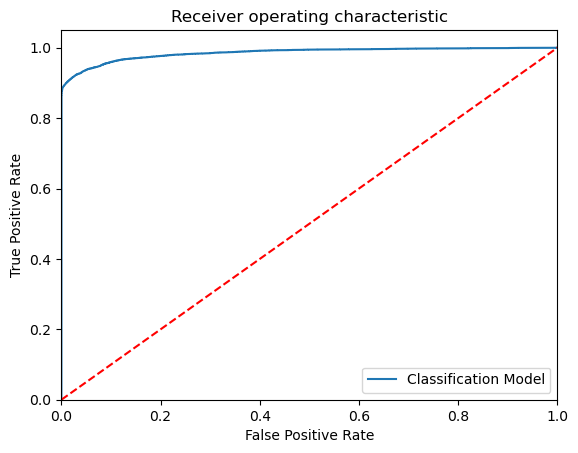

-----------------------------------------------------------------------------------------------------


In [213]:
#LOGISTIC REGRESSION:

# To build the decision tree model with random sampling

from sklearn.linear_model import LogisticRegression 

# Create an object for LR model

ModelLR = LogisticRegression()

# Train the model with training data

ModelLR = ModelLR.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelLR.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelLR.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
 #----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' :ModelLR ,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
CSResults = CSResults.append(new_row, ignore_index=True)

In [214]:
CSResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),12858,1749,110,73881,0.979,0.992,0.88,0.933,0.999,MCC,0.939388,0.94


In [215]:
# Predict the values with LogisticRegression algorithm

y_predF = ModelLR.predict(x_test)

In [216]:
Results = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P_F':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Auto_Claim_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F
62203,5/20/2015,HR-147224052,Car,1441.82,EA,AZ,53,Female,Married,Bachelors,Engineer,35,Commute,14631,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Toyota,38037.20,Semi Urban,Major,No,0,0
222516,4/19/2018,IB-151134719,Car,1372.86,EA,AZ,44,Male,Married,PhD,painter,21,Commute,13337,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,0.66,Chrysler,27284.61,Semi Urban,Major,No,0,0
14785,3/17/2016,ID-187207654,Truck,1369.06,IA,CA,40,Male,Married,Masters,Engineer,28,Pleasure,20696,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Volvo,23445.09,Semi Urban,Major,No,0,0
115152,2/14/2018,GQ-176069466,Car,1523.89,IA,NV,51,Female,Married,High School,Carpenter,36,Pleasure,23224,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,0.00,GM,46866.12,Semi Urban,Major,No,0,0
60289,4/25/2017,OQ-132304107,Car,1605.41,EA,CA,51,Female,Married,Bachelors,Architect,37,Business,30054,1,2,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Toyota,24217.53,Semi Urban,Major,No,0,0


In [217]:
# Calculate the %of Error

ResultsFinal['%Error'] = round(((ResultsFinal['Claimed_A']-ResultsFinal['Claimed_P_F'])/ResultsFinal['Claimed_A'])*100,3)

In [218]:
# Display the results

ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F,%Error
160107,5/1/2014,NO-191369409,Car,1438.37,IA,OR,79,Female,Married,High School,Student,66,Pleasure,17997,0,0,Basic,CL144120603,No,1/2/2019,Yes,Yes,No,5202.96,Ford,23040.85,Country side,Fatal,Yes,0,0,NaN
73854,10/23/2014,KE-153878246,Car,1580.42,EA,NV,53,Female,Married,Bachelors,Architect,38,Business,31454,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,12.24,Mercedes,41520.71,Semi Urban,Major,No,0,0,NaN
245890,11/11/2018,ZT-157231934,Car,1772.00,EA,NV,40,Female,Married,Masters,Lawyer,15,Pleasure,10116,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,23877.64,Semi Urban,Major,No,0,0,NaN
13383,3/11/2012,QR-160002662,Car,1563.67,EA,OR,49,Male,Married,Masters,Engineer,48,Commute,18184,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Ferrari,18146.26,Semi Urban,Major,No,0,0,NaN
238375,9/24/2014,BG-170583893,Van,1778.98,EA,CA,34,Female,Married,Bachelors,Engineer,16,Pleasure,13112,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Chevrolet,24063.16,Semi Urban,Major,No,0,0,NaN


In [219]:
Logistic_regression_analysis=ResultsFinal.copy()

In [220]:
#Export Data Frame to Excel
Logistic_regression_analysis.to_excel("C:\\Users\\sriha\\Data Science\\CAPSTONE PROJECT\\SR_20B91A04J11\\Excel files after analysis\\aut_ov_sampling\\Logistic_regression_analysis.xlsx")

In [221]:
#2ND-ALGORITHM

Confusion matrix : 
 [[14142   465]
 [  929 73062]]
Outcome values : 
 14142 465 929 73062
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.97      0.95     14607
           0       0.99      0.99      0.99     73991

    accuracy                           0.98     88598
   macro avg       0.97      0.98      0.97     88598
weighted avg       0.98      0.98      0.98     88598

Accuracy : 98.4 %
Precision : 93.8 %
Recall : 96.8 %
F1 Score : 0.953
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 97.8 %
MCC : 0.944
roc_auc_score: 0.978


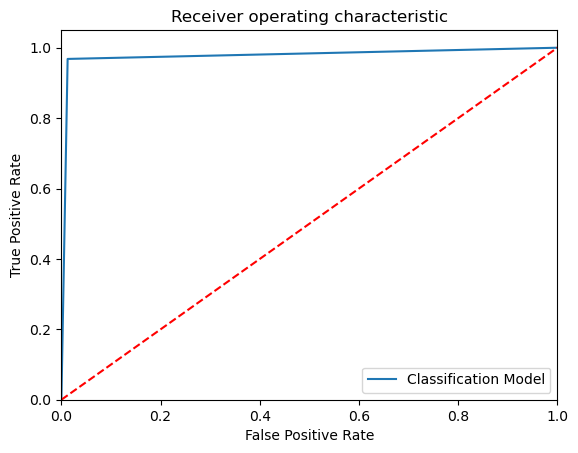

-----------------------------------------------------------------------------------------------------


In [222]:
#DECISION TREE CLASSIFIER ALGORITHM

# To build the 'Decision Tree' model with random sampling

from sklearn.tree import DecisionTreeClassifier 

# Create an object for model

ModelDT = DecisionTreeClassifier()
#ModelDT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
#                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
#                                 random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                                 class_weight=None, ccp_alpha=0.0)

# Train the model with train data 

ModelDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelDT.predict(x_test)
y_pred_prob = ModelDT.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelDT.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
 #----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelDT,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
CSResults = CSResults.append(new_row, ignore_index=True)

In [223]:
CSResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),12858,1749,110,73881,0.979,0.992,0.880,0.933,0.999,MCC,0.939388,0.940
1,DecisionTreeClassifier(),14142,465,929,73062,0.984,0.938,0.968,0.953,0.987,MCC,0.977805,0.978


In [224]:
# Predict the values with DecisionTreeClassifier algorithm

y_predF = ModelDT.predict(x_test)

In [225]:
Results = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P_F':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Auto_Claim_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F
230036,2/13/2017,SS-163893211,Car,1460.89,EA,CA,63,Male,Married,Masters,Engineer,50,Pleasure,15996,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,7.94,Hyundai,23978.13,Semi Urban,Major,No,0,0
277538,4/17/2016,FG-190011864,Car,1711.72,IA,AZ,75,Male,Married,High School,painter,61,Business,13699,0,0,Basic,CL144120603,No,9/30/2018,No,No,No,0.00,Chrysler,28661.21,Semi Urban,Major,No,1,1
199096,2/19/2014,NC-162047280,Car,1528.72,EA,OR,52,Male,Married,High School,Worker,32,Pleasure,13529,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Lincoln,23394.43,Semi Urban,Major,No,0,0
171728,2/8/2015,XA-179456289,Truck,1430.86,EA,CA,45,Female,Married,Bachelors,Architect,31,Business,23395,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,7.79,Mercedes,39751.06,Semi Urban,Major,No,0,0
75658,4/29/2018,JS-187169442,Truck,1456.39,IA,CA,48,Female,Married,Bachelors,Engineer,30,Business,21086,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,0.00,Volvo,40063.89,Semi Urban,Major,No,0,0


In [226]:
# Calculate the %of Error

ResultsFinal['%Error'] = round(((ResultsFinal['Claimed_A']-ResultsFinal['Claimed_P_F'])/ResultsFinal['Claimed_A'])*100,3)

In [227]:
# Display the results

ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F,%Error
170748,2/4/2019,LI-167276913,Van,1815.98,EA,CA,63,Female,Single,High School,Artist,31,Pleasure,31190,1,1,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Ford,17035.90,Semi Urban,Major,No,0,1,-inf
122787,8/16/2018,RI-148306604,Car,1586.31,EA,CA,33,Male,Married,PhD,Engineer,18,Commute,16772,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Nissan,23627.56,Semi Urban,Major,No,0,0,NaN
148668,1/29/2019,IS-176818059,Car,1604.04,EA,NV,51,Female,Married,Bachelors,Engineer,41,Pleasure,16413,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,26.99,Nissan,14298.73,Semi Urban,Major,No,0,0,NaN
245110,1/17/2015,SY-132449927,Car,1472.01,EA,CA,40,Female,Married,Masters,Lawyer,14,Pleasure,14320,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.60,Chevrolet,27800.51,Semi Urban,Major,No,0,0,NaN
256405,10/17/2016,OK-127083195,Van,1597.47,EA,CA,30,Female,Married,High School,Carpenter,45,Pleasure,12482,1,1,Balanced,CL000021666,Yes,4/14/2018,Yes,No,Yes,16873.24,BMW,24849.31,Rural,Major,Yes,0,0,NaN


In [228]:
Decision_tree_classfier_analysis=ResultsFinal.copy()

In [229]:
#Export Data Frame to Excel
Decision_tree_classfier_analysis.to_excel("C:\\Users\\sriha\\Data Science\\CAPSTONE PROJECT\\SR_20B91A04J11\\Excel files after analysis\\aut_ov_sampling\\Decision_tree_classfier_analysis.xlsx")

Feature: 0, Score: 0.01348
Feature: 1, Score: 0.01395
Feature: 2, Score: 0.00176
Feature: 3, Score: 0.01644
Feature: 4, Score: 0.00147
Feature: 5, Score: 0.00210
Feature: 6, Score: 0.00866
Feature: 7, Score: 0.00083
Feature: 8, Score: 0.00191
Feature: 9, Score: 0.00148
Feature: 10, Score: 0.00256
Feature: 11, Score: 0.00768
Feature: 12, Score: 0.00205
Feature: 13, Score: 0.01226
Feature: 14, Score: 0.00562
Feature: 15, Score: 0.00151
Feature: 16, Score: 0.00130
Feature: 17, Score: 0.00442
Feature: 18, Score: 0.00133
Feature: 19, Score: 0.00172
Feature: 20, Score: 0.82066
Feature: 21, Score: 0.00036
Feature: 22, Score: 0.00079
Feature: 23, Score: 0.03636
Feature: 24, Score: 0.00552
Feature: 25, Score: 0.01494
Feature: 26, Score: 0.01537
Feature: 27, Score: 0.00348


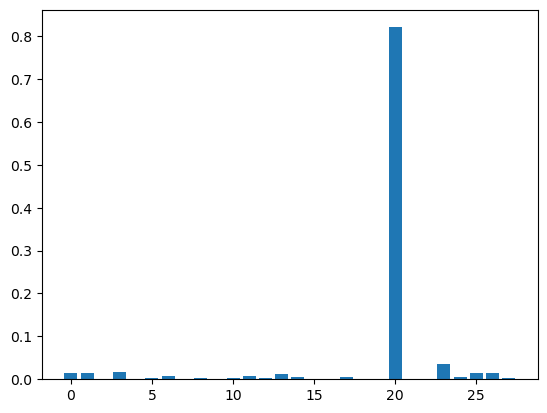

In [230]:
# To get feature importance

from matplotlib import pyplot

importance = ModelDT.feature_importances_

# Summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [231]:
# Results (Run upto here only)

PredResults = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P':y_pred})

# Merge two Dataframes on index of both the dataframes

TestDataResults = Auto_Claim_new.merge(PredResults, left_index=True, right_index=True)

# Display the 10 records randomly

TestDataResults.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P
274151,119,12993,1,1517.25,1,1,29,1,4,4,7,27,2,17207,0,0,1,2789,0,1536,0,0,0,0.0,13,27581.96,2,1,0,1,1
48560,292,13977,0,1745.41,1,2,52,1,4,1,3,35,2,15879,0,0,2,2789,0,53,0,0,0,0.0,5,14007.21,2,1,0,0,0
92752,1788,21145,0,1452.87,0,1,29,1,1,2,7,16,2,13631,0,0,1,2789,0,53,0,0,0,0.0,6,23690.88,2,1,0,0,0
261410,2735,824,2,1471.42,1,1,87,1,2,1,2,69,2,29164,0,0,1,2789,0,1536,0,0,0,0.0,9,29075.84,2,1,0,0,0
220591,1784,19240,0,1528.01,0,0,47,1,4,1,7,20,1,13694,0,0,0,2789,0,1536,0,0,0,0.0,11,19048.38,2,1,0,0,0


In [232]:
#3RD-ALGORITHM

Confusion matrix : 
 [[14219   388]
 [   68 73923]]
Outcome values : 
 14219 388 68 73923
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.97      0.98     14607
           0       0.99      1.00      1.00     73991

    accuracy                           0.99     88598
   macro avg       1.00      0.99      0.99     88598
weighted avg       0.99      0.99      0.99     88598

Accuracy : 99.5 %
Precision : 99.5 %
Recall : 97.3 %
F1 Score : 0.984
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 98.6 %
MCC : 0.981
roc_auc_score: 0.986


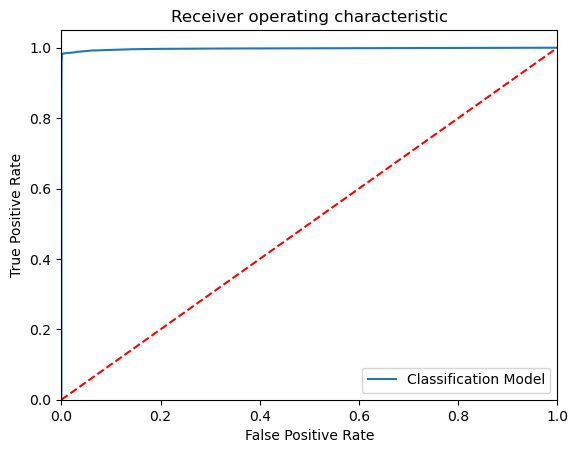

-----------------------------------------------------------------------------------------------------


In [233]:
#RANDOM FOREST:

# To build the 'Random Forest' model with random sampling

from sklearn.ensemble import RandomForestClassifier

# Create model object

ModelRF = RandomForestClassifier()
#ModelRF = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
#                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
#                                 max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
#                                 n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
#                                 ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF.predict_proba(x_test)[:,1])
plt.figure()
#--------------------------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
 #----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelRF,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
CSResults = CSResults.append(new_row, ignore_index=True)

In [234]:
CSResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),12858,1749,110,73881,0.979,0.992,0.880,0.933,0.999,MCC,0.939388,0.940
1,DecisionTreeClassifier(),14142,465,929,73062,0.984,0.938,0.968,0.953,0.987,MCC,0.977805,0.978
2,"(DecisionTreeClassifier(max_features='sqrt', r...",14219,388,68,73923,0.995,0.995,0.973,0.984,0.999,MCC,0.986259,0.986


In [235]:
# Predict the values with RandomForestClassifier algorithm

y_predF = ModelRF.predict(x_test)

In [236]:
Results = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P_F':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Auto_Claim_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F
266826,12/16/2013,PY-176907213,Car,1569.78,IA,NV,76,Female,Married,High School,Architect,36,Commute,24184,0,1,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Toyota,33620.30,Semi Urban,Major,No,1,1
10462,12/27/2019,EA-131168389,Car,1590.84,EA,CA,36,Female,Married,Masters,Engineer,17,Commute,13912,1,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.53,Chevrolet,13662.98,Semi Urban,Major,No,0,0
244595,2/12/2016,JZ-185673531,Car,1173.62,IA,CA,43,Male,Widow,Masters,Carpenter,31,Business,31301,0,0,Basic,CL144120603,No,9/30/2018,No,No,No,0.00,Honda,39419.20,Semi Urban,Major,No,1,1
233105,2/2/2017,JR-139640866,Car,1531.58,IA,OR,51,Male,Married,Bachelors,Worker,38,Pleasure,27361,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Ferrari,16809.36,Semi Urban,Major,No,0,0
274182,2/7/2014,RR-132719054,Truck,1590.73,EA,CA,51,Female,Married,Bachelors,Architect,33,Business,24217,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,0.00,Volvo,40365.25,Semi Urban,Major,No,1,0


In [237]:
# Calculate the %of Error

ResultsFinal['%Error'] = round(((ResultsFinal['Claimed_A']-ResultsFinal['Claimed_P_F'])/ResultsFinal['Claimed_A'])*100,3)

In [238]:
# Display the results

ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F,%Error
164425,2/1/2018,XD-186231930,Car,1590.00,EA,OR,51,Male,Married,Bachelors,Engineer,34,Commute,14318,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.0,Chevrolet,26991.76,Semi Urban,Major,No,0,0,NaN
248494,2/2/2015,ML-198869438,Car,1699.37,EA,CA,29,Male,Single,High School,ITENGINEER,15,Pleasure,16427,0,2,Balanced,CL144120603,No,1/2/2019,No,No,No,0.0,Hyundai,19711.15,Semi Urban,Major,No,0,0,NaN
146644,3/24/2015,RB-136049821,Van,1593.73,EA,AZ,67,Male,Married,High School,Carpenter,52,Business,11339,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.0,Chrysler,14112.04,Semi Urban,Major,No,0,0,NaN
22003,2/28/2014,PX-167196822,Car,1287.65,IA,OR,43,Male,Married,Masters,Manager,20,Commute,10957,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,0.0,Chevrolet,28252.13,Semi Urban,Major,No,0,0,NaN
27035,5/28/2018,UZ-130347004,Van,1628.68,EA,CA,43,Male,Married,High School,Professor,51,Pleasure,13716,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.0,Hyundai,23590.73,Semi Urban,Major,No,0,0,NaN


In [239]:
Random_forest_classfier_analysis=ResultsFinal.copy()

In [240]:
#Export Data Frame to Excel
Random_forest_classfier_analysis.to_excel("C:\\Users\\sriha\\Data Science\\CAPSTONE PROJECT\\SR_20B91A04J11\\Excel files after analysis\\aut_ov_sampling\\Random_forest_classfier_analysis.xlsx")

Feature: 0, Score: 0.01185
Feature: 1, Score: 0.01164
Feature: 2, Score: 0.00251
Feature: 3, Score: 0.01299
Feature: 4, Score: 0.00153
Feature: 5, Score: 0.00301
Feature: 6, Score: 0.01039
Feature: 7, Score: 0.00157
Feature: 8, Score: 0.00335
Feature: 9, Score: 0.00293
Feature: 10, Score: 0.00398
Feature: 11, Score: 0.00911
Feature: 12, Score: 0.00253
Feature: 13, Score: 0.01459
Feature: 14, Score: 0.01830
Feature: 15, Score: 0.00742
Feature: 16, Score: 0.00226
Feature: 17, Score: 0.18737
Feature: 18, Score: 0.00931
Feature: 19, Score: 0.00879
Feature: 20, Score: 0.24678
Feature: 21, Score: 0.01490
Feature: 22, Score: 0.06264
Feature: 23, Score: 0.23184
Feature: 24, Score: 0.01685
Feature: 25, Score: 0.01226
Feature: 26, Score: 0.06259
Feature: 27, Score: 0.02670


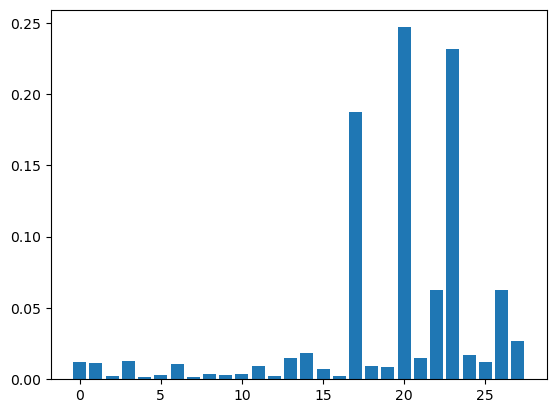

In [241]:
# To get feature importance

from matplotlib import pyplot

importance = ModelRF.feature_importances_

# Summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [242]:
# Results (Run upto here only)

PredResults = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P':y_pred})

# Merge two Dataframes on index of both the dataframes

TestDataResults = Auto_Claim_new.merge(PredResults, left_index=True, right_index=True)

# Display the 10 records randomly

TestDataResults.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P
152972,1068,6899,2,1299.01,0,3,70,1,4,1,2,52,0,32125,1,1,0,7,1,1556,1,0,0,16669.06,2,21243.44,1,2,1,0,0
223644,1359,23405,0,1718.68,0,3,36,1,1,1,5,17,1,12102,0,0,0,2789,1,1536,0,0,0,3.36,13,34198.54,2,1,0,0,0
141965,440,12618,2,1528.27,0,1,69,1,1,1,0,49,2,16401,1,2,1,2789,0,1536,0,0,0,0.00,14,27382.32,2,1,0,0,0
180997,1493,3969,0,1564.07,1,2,71,0,4,2,7,38,2,16228,1,1,1,2789,0,53,0,0,0,0.00,20,15821.33,2,1,0,0,0
147194,2418,24708,0,1515.96,0,1,48,1,1,1,2,18,2,11669,0,1,1,2789,0,1536,0,0,0,0.00,13,23932.89,2,1,0,0,0


In [243]:
#4TH-ALGORITHM

Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[14334   273]
 [   64 73927]]
Outcome values : 
 14334 273 64 73927
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99     14607
           0       1.00      1.00      1.00     73991

    accuracy                           1.00     88598
   macro avg       1.00      0.99      0.99     88598
weighted avg       1.00      1.00      1.00     88598

Accuracy : 99.6 %
Precision : 99.6 %
Recall : 98.1 %
F1 Score : 0.988
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 99.0 %
MCC : 0.989
roc_auc_score: 0.99


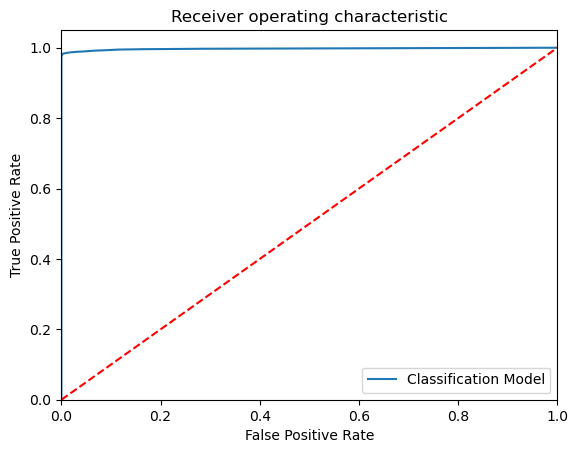

-----------------------------------------------------------------------------------------------------


In [244]:
#EXTRA TREE CLASSIFIER

# To build the 'Random Forest' model with random sampling
from sklearn.ensemble import ExtraTreesClassifier

# Create model object

ModelET = ExtraTreesClassifier()

# Evalution matrix for the algorithm

MM = [ModelET]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    #from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [245]:
CSResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),12858,1749,110,73881,0.979,0.992,0.880,0.933,0.999,MCC,0.939388,0.940
1,DecisionTreeClassifier(),14142,465,929,73062,0.984,0.938,0.968,0.953,0.987,MCC,0.977805,0.978
2,"(DecisionTreeClassifier(max_features='sqrt', r...",14219,388,68,73923,0.995,0.995,0.973,0.984,0.999,MCC,0.986259,0.986
3,"(ExtraTreeClassifier(random_state=1470271045),...",14334,273,64,73927,0.996,0.996,0.981,0.988,0.999,MCC,0.990223,0.990


In [246]:
# Predict the values with ExtraTreeClassifier algorithm

y_predF = ModelET.predict(x_test)

In [247]:
Results = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P_F':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Auto_Claim_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F
197483,12/16/2014,BH-178701450,Car,1496.43,EA,AZ,45,Female,Married,PhD,CEO,36,Business,29958,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,0.0,Ford,14086.69,Semi Urban,Major,No,0,0
42736,12/24/2016,RX-141134607,Van,1603.53,EA,CA,60,Male,Married,Bachelors,Artist,33,Business,33644,0,1,Balanced,CL144120603,No,9/30/2018,No,No,No,0.0,Bugatti,38944.76,Semi Urban,Major,No,0,0
262218,5/20/2014,UC-164961616,Car,2084.45,IA,AZ,84,Male,Divorced,PhD,Manager,63,Commute,33620,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,0.0,Lamborghini,16541.23,Semi Urban,Major,No,0,0
55682,5/1/2017,YC-177888522,Truck,1616.60,IA,NV,46,Female,Married,High School,Worker,61,Pleasure,23325,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.0,GM,37907.23,Semi Urban,Major,No,0,0
54878,11/22/2019,JY-168780898,Van,1620.51,EA,CA,44,Female,Married,High School,driver,32,Pleasure,16399,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,1.3,Datsun,74322.24,Semi Urban,Major,No,0,0


In [248]:
# Calculate the %of Error

ResultsFinal['%Error'] = round(((ResultsFinal['Claimed_A']-ResultsFinal['Claimed_P_F'])/ResultsFinal['Claimed_A'])*100,3)

In [249]:
# Display the results

ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F,%Error
169952,8/1/2019,LB-163287583,Van,1738.99,EA,CA,52,Male,Married,PhD,CEO,54,Business,32095,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Kia,13951.43,Semi Urban,Major,No,0,0,NaN
193976,7/26/2019,IN-154390352,Car,1517.91,EA,CA,28,Male,Single,Bachelors,ITENGINEER,13,Pleasure,15049,0,1,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Nissan,28287.02,Semi Urban,Major,No,0,0,NaN
12478,3/27/2016,LB-194058803,Van,1485.51,IA,CA,61,Male,Divorced,Bachelors,Artist,42,Business,31305,1,1,Balanced,CL144120603,No,9/30/2018,No,No,Yes,0.00,Ford,41994.65,Semi Urban,Major,No,0,0,NaN
160683,5/8/2012,YF-146394026,Truck,1980.98,IA,CA,90,Male,Divorced,Masters,Manager,66,Commute,23371,0,0,Enhanced,CL144120603,No,9/30/2018,Yes,No,Yes,1764.29,Bentley,39071.17,Semi Urban,Minor,Yes,0,0,NaN
53807,7/23/2019,YD-164165589,Car,1714.21,IA,AZ,91,Male,Married,High School,Manager,62,Commute,29578,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Chevrolet,32149.57,Semi Urban,Major,No,0,0,NaN


In [250]:
Extra_tree_classfier_analysis=ResultsFinal.copy()

In [251]:
#Export Data Frame to Excel
Extra_tree_classfier_analysis.to_excel("C:\\Users\\sriha\\Data Science\\CAPSTONE PROJECT\\SR_20B91A04J11\\Excel files after analysis\\aut_ov_sampling\\Extra_tree_classfier_analysis.xlsx")

In [252]:
#5TH-ALGORITHM

In [253]:
# Load the results dataset

KNNResults = pd.read_csv(r"C:\Users\sriha\Data Science\data by sir\day 4\session 1\KNN_Results.csv", header=0)



KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[14310   297]
 [  672 73319]]
Outcome values : 
 14310 297 672 73319
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97     14607
           0       1.00      0.99      0.99     73991

    accuracy                           0.99     88598
   macro avg       0.98      0.99      0.98     88598
weighted avg       0.99      0.99      0.99     88598

Accuracy : 98.9 %
Precision : 95.5 %
Recall : 98.0 %
F1 Score : 0.967
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 98.6 %
MCC : 0.961
roc_auc_score: 0.985


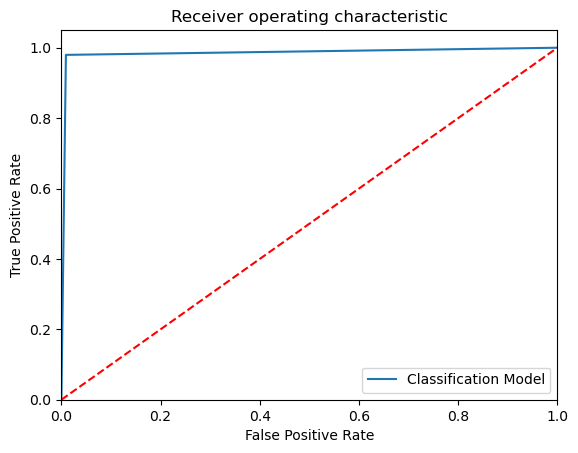

-----------------------------------------------------------------------------------------------------
KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[13623   984]
 [  444 73547]]
Outcome values : 
 13623 984 444 73547
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.93      0.95     14607
           0       0.99      0.99      0.99     73991

    accuracy                           0.98     88598
   macro avg       0.98      0.96      0.97     88598
weighted avg       0.98      0.98      0.98     88598

Accuracy : 98.4 %
Precision : 96.8 %
Recall : 93.3 %
F1 Score : 0.95
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 96.4 %
MCC : 0.941
roc_auc_score: 0.963


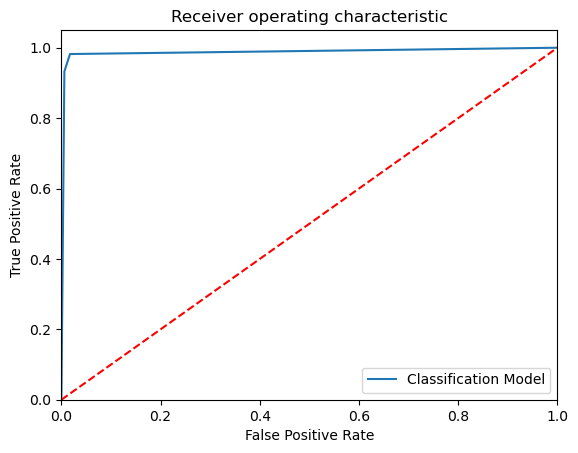

-----------------------------------------------------------------------------------------------------
KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[13737   870]
 [  851 73140]]
Outcome values : 
 13737 870 851 73140
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.94      0.94     14607
           0       0.99      0.99      0.99     73991

    accuracy                           0.98     88598
   macro avg       0.96      0.96      0.96     88598
weighted avg       0.98      0.98      0.98     88598

Accuracy : 98.1 %
Precision : 94.2 %
Recall : 94.0 %
F1 Score : 0.941
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 96.4 %
MCC : 0.929
roc_auc_score: 0.964


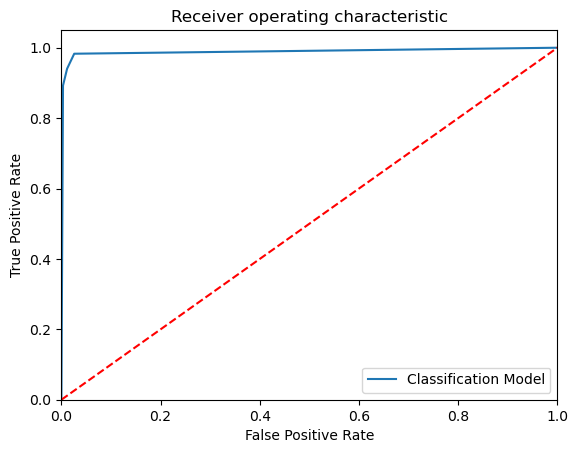

-----------------------------------------------------------------------------------------------------
KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[13202  1405]
 [  456 73535]]
Outcome values : 
 13202 1405 456 73535
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.90      0.93     14607
           0       0.98      0.99      0.99     73991

    accuracy                           0.98     88598
   macro avg       0.97      0.95      0.96     88598
weighted avg       0.98      0.98      0.98     88598

Accuracy : 97.9 %
Precision : 96.7 %
Recall : 90.4 %
F1 Score : 0.934
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 94.9 %
MCC : 0.922
roc_auc_score: 0.949


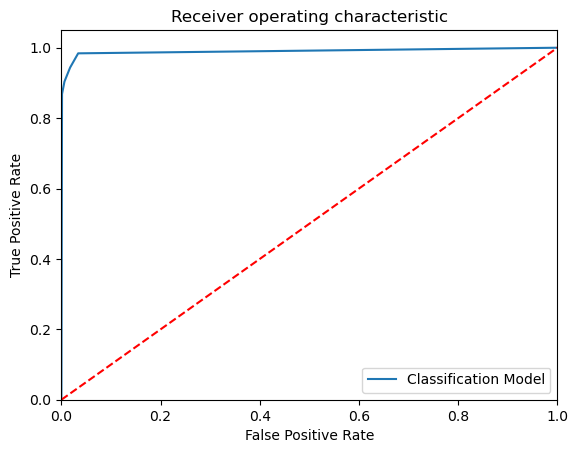

-----------------------------------------------------------------------------------------------------
KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[13274  1333]
 [  697 73294]]
Outcome values : 
 13274 1333 697 73294
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.91      0.93     14607
           0       0.98      0.99      0.99     73991

    accuracy                           0.98     88598
   macro avg       0.97      0.95      0.96     88598
weighted avg       0.98      0.98      0.98     88598

Accuracy : 97.7 %
Precision : 95.0 %
Recall : 90.9 %
F1 Score : 0.929
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 95.0 %
MCC : 0.916
roc_auc_score: 0.95


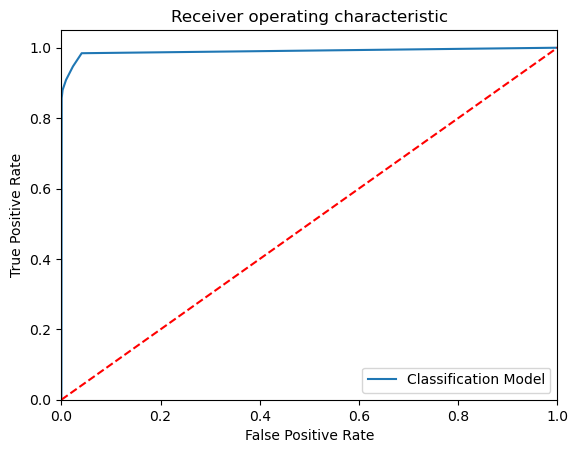

-----------------------------------------------------------------------------------------------------
KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[12924  1683]
 [  284 73707]]
Outcome values : 
 12924 1683 284 73707
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.88      0.93     14607
           0       0.98      1.00      0.99     73991

    accuracy                           0.98     88598
   macro avg       0.98      0.94      0.96     88598
weighted avg       0.98      0.98      0.98     88598

Accuracy : 97.8 %
Precision : 97.8 %
Recall : 88.5 %
F1 Score : 0.929
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 94.0 %
MCC : 0.918
roc_auc_score: 0.94


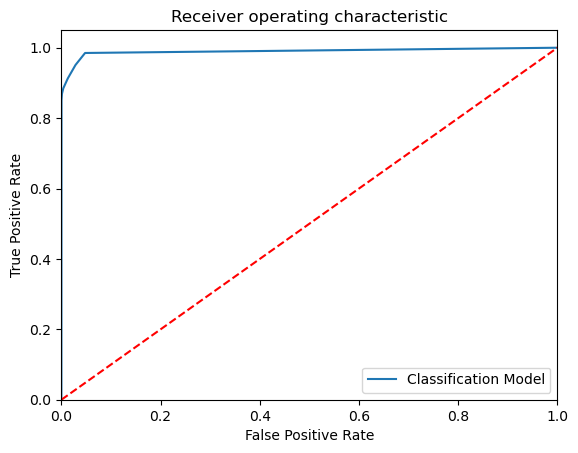

-----------------------------------------------------------------------------------------------------
KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[12992  1615]
 [  397 73594]]
Outcome values : 
 12992 1615 397 73594
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.89      0.93     14607
           0       0.98      0.99      0.99     73991

    accuracy                           0.98     88598
   macro avg       0.97      0.94      0.96     88598
weighted avg       0.98      0.98      0.98     88598

Accuracy : 97.7 %
Precision : 97.0 %
Recall : 88.9 %
F1 Score : 0.928
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 94.2 %
MCC : 0.916
roc_auc_score: 0.942


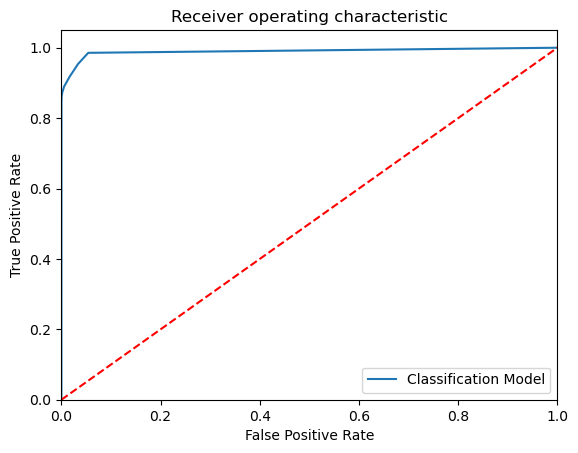

-----------------------------------------------------------------------------------------------------
KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[12826  1781]
 [  203 73788]]
Outcome values : 
 12826 1781 203 73788
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.88      0.93     14607
           0       0.98      1.00      0.99     73991

    accuracy                           0.98     88598
   macro avg       0.98      0.94      0.96     88598
weighted avg       0.98      0.98      0.98     88598

Accuracy : 97.8 %
Precision : 98.4 %
Recall : 87.8 %
F1 Score : 0.928
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 93.8 %
MCC : 0.917
roc_auc_score: 0.938


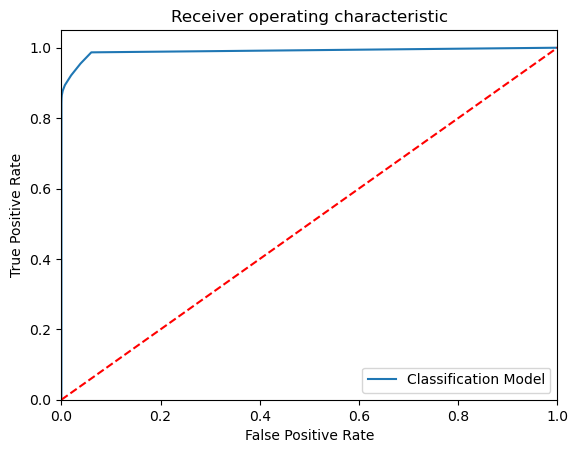

-----------------------------------------------------------------------------------------------------
KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[12867  1740]
 [  276 73715]]
Outcome values : 
 12867 1740 276 73715
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.88      0.93     14607
           0       0.98      1.00      0.99     73991

    accuracy                           0.98     88598
   macro avg       0.98      0.94      0.96     88598
weighted avg       0.98      0.98      0.98     88598

Accuracy : 97.7 %
Precision : 97.9 %
Recall : 88.1 %
F1 Score : 0.927
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 93.8 %
MCC : 0.916
roc_auc_score: 0.939


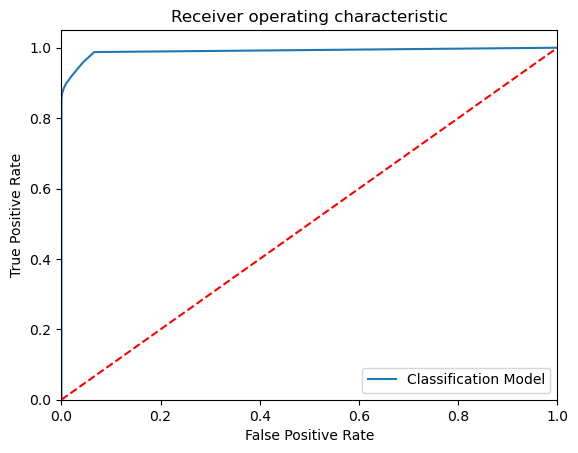

-----------------------------------------------------------------------------------------------------
KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[12735  1872]
 [  142 73849]]
Outcome values : 
 12735 1872 142 73849
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.87      0.93     14607
           0       0.98      1.00      0.99     73991

    accuracy                           0.98     88598
   macro avg       0.98      0.93      0.96     88598
weighted avg       0.98      0.98      0.98     88598

Accuracy : 97.7 %
Precision : 98.9 %
Recall : 87.2 %
F1 Score : 0.927
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 93.5 %
MCC : 0.916
roc_auc_score: 0.935


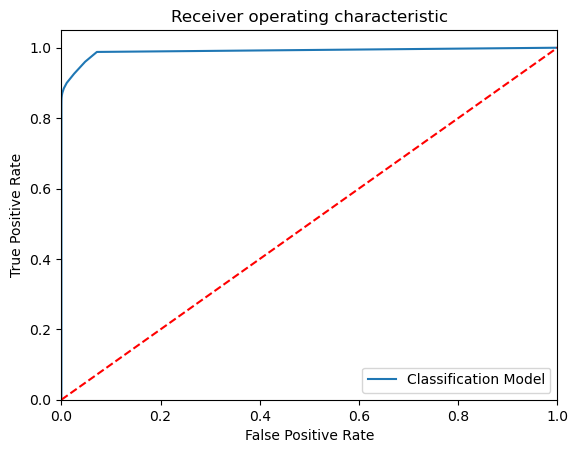

-----------------------------------------------------------------------------------------------------


In [254]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 11, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    #--------------------------------------------------------tp, fn, fp, tn
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score': roc_auc_score(actual, predicted),
               'Balanced Accuracy': balanced_accuracy}
    KNNResults = KNNResults.append(new_row, ignore_index=True)
    #--------------------------------------------------------
    print('-----------------------------------------------------------------------------------------------------')

In [255]:
KNNResults

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,14310,297,672,73319,0.989,0.955,0.980,0.967,0.991,0.961,0.985293,0.986
1,KNeighborsClassifier(n_neighbors=2),2,13623,984,444,73547,0.984,0.968,0.933,0.950,0.994,0.941,0.963317,0.964
2,KNeighborsClassifier(n_neighbors=3),3,13737,870,851,73140,0.981,0.942,0.940,0.941,0.988,0.929,0.964469,0.964
3,KNeighborsClassifier(n_neighbors=4),4,13202,1405,456,73535,0.979,0.967,0.904,0.934,0.994,0.922,0.948825,0.949
4,KNeighborsClassifier(),5,13274,1333,697,73294,0.977,0.950,0.909,0.929,0.991,0.916,0.949661,0.950
5,KNeighborsClassifier(n_neighbors=6),6,12924,1683,284,73707,0.978,0.978,0.885,0.929,0.996,0.918,0.940471,0.940
6,KNeighborsClassifier(n_neighbors=7),7,12992,1615,397,73594,0.977,0.970,0.889,0.928,0.995,0.916,0.942036,0.942
7,KNeighborsClassifier(n_neighbors=8),8,12826,1781,203,73788,0.978,0.984,0.878,0.928,0.997,0.917,0.937664,0.938
8,KNeighborsClassifier(n_neighbors=9),9,12867,1740,276,73715,0.977,0.979,0.881,0.927,0.996,0.916,0.938574,0.938
9,KNeighborsClassifier(n_neighbors=10),10,12735,1872,142,73849,0.977,0.989,0.872,0.927,0.998,0.916,0.934962,0.935


In [256]:
#After comparision above table we can say that at k=5 we get best result for KNN algorithm

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[13274  1333]
 [  697 73294]]
Outcome values : 
 13274 1333 697 73294
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.91      0.93     14607
           0       0.98      0.99      0.99     73991

    accuracy                           0.98     88598
   macro avg       0.97      0.95      0.96     88598
weighted avg       0.98      0.98      0.98     88598

Accuracy : 97.7 %
Precision : 95.0 %
Recall : 90.9 %
F1 Score : 0.929
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 95.0 %
MCC : 0.916
roc_auc_score: 0.95


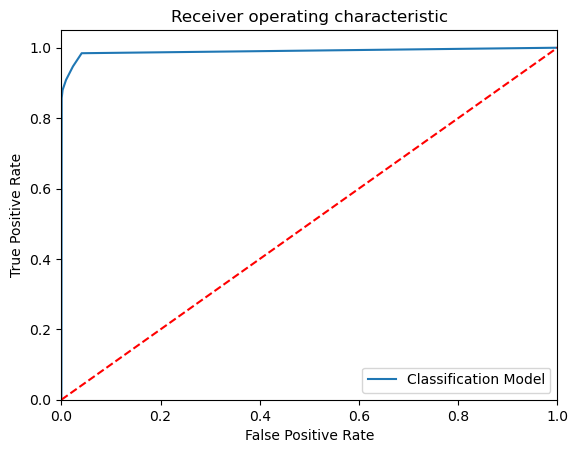

-----------------------------------------------------------------------------------------------------


In [257]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

#for a in range(1, 11, 1):
    
k = a = 5
    
# Build the model
    
ModelKNN = KNeighborsClassifier(n_neighbors=k)

# Train the model
    
ModelKNN.fit(x_train, y_train)
    
# Predict the model
    
y_pred = ModelKNN.predict(x_test)
y_pred_prob = ModelKNN.predict_proba(x_test)
    
print('KNN_K_value = ', a)
    
# Print the model name
    
print('Model Name: ', ModelKNN)
    
# confusion matrix in sklearn
    
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
    
# actual values
    
actual = y_test
    
# predicted values
    
predicted = y_pred
    
# confusion matrix
    
matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
    
# outcome values order in sklearn
    
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
    
# classification report for precision, recall f1-score and accuracy
    
C_Report = classification_report(actual,predicted,labels=[1,0])
    
print('Classification report : \n', C_Report)
    
# calculating the metrics
    
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model
    
from math import sqrt
    
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)
    
# Area under ROC curve 
    
from sklearn.metrics import roc_curve, roc_auc_score
    
print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
# ROC Curve
    
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
#--------------------------------------------------------tp, fn, fp, tn
new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score': roc_auc_score(actual, predicted),
               'Balanced Accuracy': balanced_accuracy}
CSResults = CSResults.append(new_row, ignore_index=True)
#--------------------------------------------------------
print('-----------------------------------------------------------------------------------------------------')

In [258]:
CSResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,KNN K Value
0,LogisticRegression(),12858,1749,110,73881,0.979,0.992,0.880,0.933,0.999,MCC,0.939388,0.940,NaN
1,DecisionTreeClassifier(),14142,465,929,73062,0.984,0.938,0.968,0.953,0.987,MCC,0.977805,0.978,NaN
2,"(DecisionTreeClassifier(max_features='sqrt', r...",14219,388,68,73923,0.995,0.995,0.973,0.984,0.999,MCC,0.986259,0.986,NaN
3,"(ExtraTreeClassifier(random_state=1470271045),...",14334,273,64,73927,0.996,0.996,0.981,0.988,0.999,MCC,0.990223,0.990,NaN
4,KNeighborsClassifier(),13274,1333,697,73294,0.977,0.950,0.909,0.929,0.991,0.916,0.949661,0.950,5.0


In [259]:
# Predict the values with KNeighborsClassifier algorithm

y_predF = ModelKNN.predict(x_test)

In [260]:
Results = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P_F':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Auto_Claim_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F
60509,2/8/2019,AM-145428095,Car,1481.88,EA,AZ,42,Male,Married,Masters,Engineer,21,Commute,14425,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Chevrolet,28194.82,Semi Urban,Major,No,0,0
208928,2/19/2018,WD-131331674,Van,1374.13,EA,CA,29,Male,Single,High School,Student,1,Pleasure,14879,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Dodge,20327.26,Semi Urban,Major,No,0,0
181174,6/13/2017,VM-143705843,Van,1411.99,EA,CA,40,Male,Married,Masters,Engineer,16,Commute,26171,0,1,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Honda,19112.44,Semi Urban,Major,No,0,0
247013,4/16/2014,WE-183702475,Van,1602.12,EA,CA,22,Male,Single,High School,Arts,3,Pleasure,16085,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,23.30,Datsun,23275.64,Semi Urban,Major,No,0,0
261440,7/30/2015,KV-161186901,Van,1704.10,IA,CA,21,Male,Single,High School,Student,1,Pleasure,16083,0,0,Balanced,CL000002309,No,2/17/2019,Yes,Yes,Yes,16400.48,Datsun,14266.91,Rural,Major,Yes,0,0


In [261]:
# Calculate the %of Error

ResultsFinal['%Error'] = round(((ResultsFinal['Claimed_A']-ResultsFinal['Claimed_P_F'])/ResultsFinal['Claimed_A'])*100,3)

In [262]:
# Display the results

ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F,%Error
232609,7/9/2017,DT-188003801,Car,1634.91,EA,AZ,33,Male,Married,Masters,Engineer,17,Commute,13594,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,21.02,Honda,13577.20,Semi Urban,Major,No,0,0,NaN
272573,2/28/2019,SH-164542161,Car,1571.72,EA,CA,51,Female,Married,High School,Carpenter,34,Pleasure,16285,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Hyundai,16867.98,Semi Urban,Major,No,1,1,0.0
61393,11/16/2016,ZN-145105179,Car,1661.70,IA,AZ,55,Female,Married,PhD,Engineer,50,Commute,23815,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Chevrolet,24453.39,Semi Urban,Major,No,0,0,NaN
178259,10/30/2017,KE-186875776,Car,1413.45,EA,CA,52,Female,Married,Masters,Engineer,39,Pleasure,14285,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.27,Hyundai,24031.38,Semi Urban,Major,No,0,0,NaN
277487,1/30/2015,HF-127063591,Car,1329.19,IA,OR,56,Female,Married,Bachelors,Engineer,36,Pleasure,33709,1,1,Enhanced,CL144120603,No,9/30/2018,No,No,No,2.19,Ferrari,22390.01,Semi Urban,Major,No,1,1,0.0


In [263]:
KNeighbors_Classifier_analysis=ResultsFinal.copy()

In [264]:
#Export Data Frame to Excel
KNeighbors_Classifier_analysis.to_excel("C:\\Users\\sriha\\Data Science\\CAPSTONE PROJECT\\SR_20B91A04J11\\Excel files after analysis\\aut_ov_sampling\\KNeighbors_Classifier_analysis.xlsx")

In [265]:
#6TH-ALGORITHM


In [266]:
Auto_Claim_new.head()

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed
0,683,21607,2,1176.40,0,1,63,1,4,4,9,32,1,24187,0,0,2,2789,1,53,0,0,0,0.00,16,24219.20,2,1,0
2,2491,4086,0,1268.38,1,3,66,1,4,1,2,53,1,14769,0,0,0,2789,0,53,0,0,0,0.00,13,23766.13,2,1,0
3,2089,17127,0,1921.00,1,0,89,1,2,4,8,70,1,31625,0,0,2,2789,0,1536,0,0,0,0.00,19,26992.05,2,1,0
4,212,10648,0,1582.98,0,2,69,1,4,1,2,48,0,33158,0,0,2,2789,0,1536,0,0,0,0.48,16,46506.75,2,1,0
5,5,6202,2,1548.93,0,1,33,1,1,2,3,17,2,11042,0,0,1,2789,0,53,0,0,0,0.00,13,25434.74,2,1,0


In [267]:
# Split the data and copy 10% data (stratified split on target variable) to new dataset 

Auto_Claim_T = Auto_Claim_new.groupby('Claimed', group_keys=False).apply(lambda x: x.sample(frac=0.1))

# Display the shape

Auto_Claim_T.shape

(26434, 29)

In [268]:
# Identify the Independent and Target variables

IndepVar = []
for col in Auto_Claim_T.columns:
    if col != 'Claimed':
        IndepVar.append(col)

TargetVar = 'Claimed'

x = Auto_Claim_T[IndepVar]
y = Auto_Claim_T[TargetVar]

In [269]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.20)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(29532, 28)
(29532,)


In [270]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((20672, 28), (8860, 28), (20672,), (8860,))

In [271]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [272]:
# Load the results dataset

EMResults = pd.read_csv(r"C:\Users\sriha\Data Science\CAPSTONE PROJECT\SR_20B91A04J11\EMResults.csv", header=0)



Model Name:  SVC(kernel='linear', probability=True)
Confusion matrix : 
 [[1282  221]
 [   6 7351]]
Outcome values : 
 1282 221 6 7351
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.85      0.92      1503
           0       0.97      1.00      0.98      7357

    accuracy                           0.97      8860
   macro avg       0.98      0.93      0.95      8860
weighted avg       0.97      0.97      0.97      8860

Accuracy : 97.4 %
Precision : 99.5 %
Recall : 85.3 %
F1 Score : 0.919
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 92.6 %
MCC : 0.907
roc_auc_score: 0.926


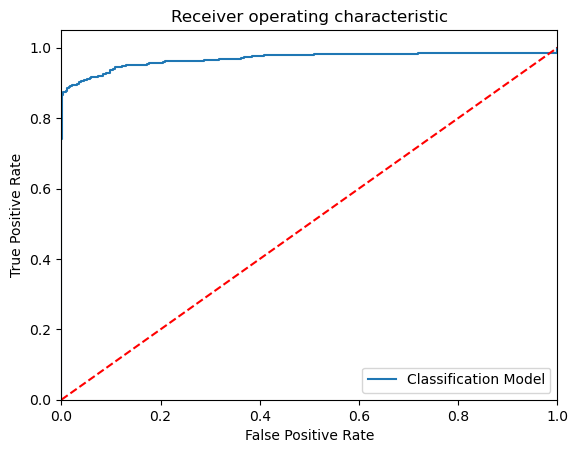

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(degree=2, kernel='poly', probability=True)
Confusion matrix : 
 [[1283  220]
 [   6 7351]]
Outcome values : 
 1283 220 6 7351
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.85      0.92      1503
           0       0.97      1.00      0.98      7357

    accuracy                           0.97      8860
   macro avg       0.98      0.93      0.95      8860
weighted avg       0.98      0.97      0.97      8860

Accuracy : 97.4 %
Precision : 99.5 %
Recall : 85.4 %
F1 Score : 0.919
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 92.6 %
MCC : 0.908
roc_auc_score: 0.926


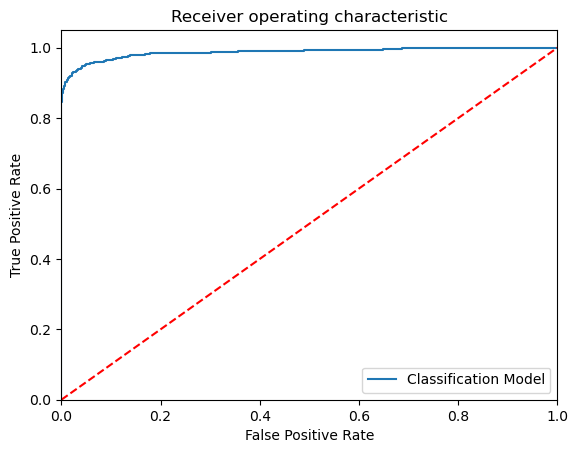

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[1400  103]
 [  96 7261]]
Outcome values : 
 1400 103 96 7261
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.93      0.93      1503
           0       0.99      0.99      0.99      7357

    accuracy                           0.98      8860
   macro avg       0.96      0.96      0.96      8860
weighted avg       0.98      0.98      0.98      8860

Accuracy : 97.8 %
Precision : 93.6 %
Recall : 93.1 %
F1 Score : 0.934
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 95.9 %
MCC : 0.92
roc_auc_score: 0.959


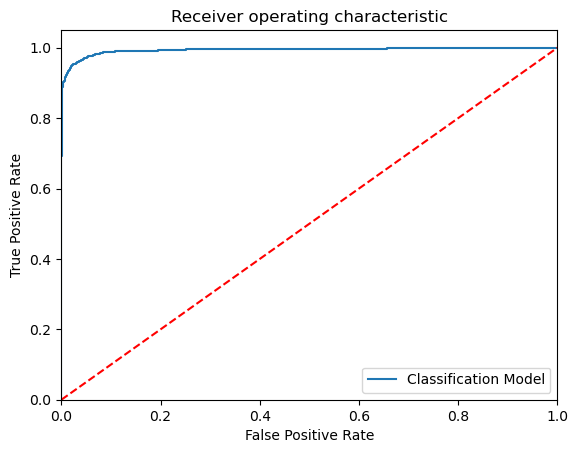

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', kernel='sigmoid', probability=True,
    random_state=42)
Confusion matrix : 
 [[1220  283]
 [1102 6255]]
Outcome values : 
 1220 283 1102 6255
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.81      0.64      1503
           0       0.96      0.85      0.90      7357

    accuracy                           0.84      8860
   macro avg       0.74      0.83      0.77      8860
weighted avg       0.88      0.84      0.86      8860

Accuracy : 84.4 %
Precision : 52.5 %
Recall : 81.2 %
F1 Score : 0.638
Specificity or True Negative Rate : 85.0 %
Balanced Accuracy : 83.1 %
MCC : 0.565
roc_auc_score: 0.831


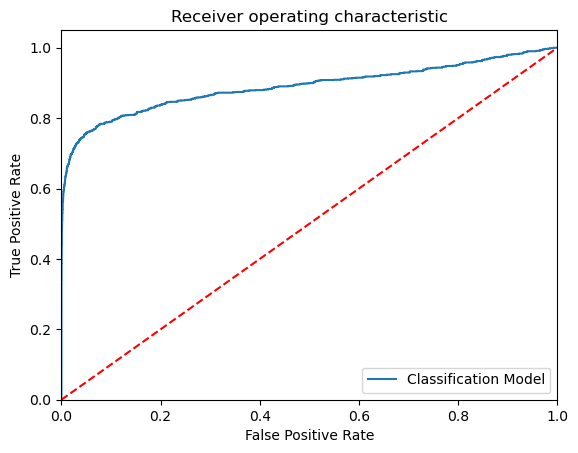

-----------------------------------------------------------------------------------------------------


In [273]:
# Build the all types of SVM Calssification models and compare the results

from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

SVMLIN = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
             probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
             max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

SVMPLY = SVC(kernel='poly', degree=2, probability=True)

SVMGSN = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

SVMSIG = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [SVMLIN, SVMPLY, SVMGSN, SVMSIG]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #---

In [274]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"SVC(kernel='linear', probability=True)",1282,221,6,7351,0.974,0.995,0.853,0.919,0.999,0.907,0.926073,0.926
1,"SVC(degree=2, kernel='poly', probability=True)",1283,220,6,7351,0.974,0.995,0.854,0.919,0.999,0.908,0.926405,0.926
2,"SVC(class_weight='balanced', probability=True,...",1400,103,96,7261,0.978,0.936,0.931,0.934,0.987,0.920,0.959211,0.959
3,"SVC(class_weight='balanced', kernel='sigmoid',...",1220,283,1102,6255,0.844,0.525,0.812,0.638,0.850,0.565,0.830960,0.831


In [275]:
#Out of all svm models we are getting the best results for SVM-Polynomial Kernel

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[1283  220]
 [   6 7351]]
Outcome values : 
 1283 220 6 7351
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.85      0.92      1503
           0       0.97      1.00      0.98      7357

    accuracy                           0.97      8860
   macro avg       0.98      0.93      0.95      8860
weighted avg       0.98      0.97      0.97      8860

Accuracy : 97.4 %
Precision : 99.5 %
Recall : 85.4 %
F1 Score : 0.919
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 92.6 %
MCC : 0.908
roc_auc_score: 0.926


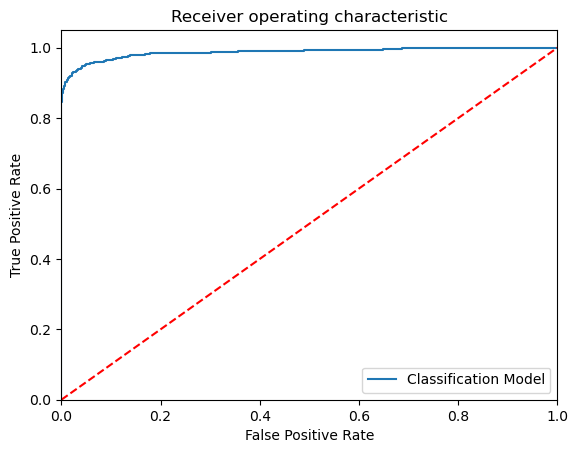

-----------------------------------------------------------------------------------------------------


In [276]:
# Training the SVM algorithm

from sklearn.svm import SVC

CustPrb_TSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

CustPrb_TSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = CustPrb_TSVMPoly.predict(x_test)
y_pred_prob = CustPrb_TSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,CustPrb_TSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
CSResults = CSResults.append(new_row, ignore_index=True)
#---

In [277]:
CSResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,KNN K Value
0,LogisticRegression(),12858,1749,110,73881,0.979,0.992,0.880,0.933,0.999,MCC,0.939388,0.940,NaN
1,DecisionTreeClassifier(),14142,465,929,73062,0.984,0.938,0.968,0.953,0.987,MCC,0.977805,0.978,NaN
2,"(DecisionTreeClassifier(max_features='sqrt', r...",14219,388,68,73923,0.995,0.995,0.973,0.984,0.999,MCC,0.986259,0.986,NaN
3,"(ExtraTreeClassifier(random_state=1470271045),...",14334,273,64,73927,0.996,0.996,0.981,0.988,0.999,MCC,0.990223,0.990,NaN
4,KNeighborsClassifier(),13274,1333,697,73294,0.977,0.950,0.909,0.929,0.991,0.916,0.949661,0.950,5.0
5,SVM - Polynominal,1283,220,6,7351,0.974,0.995,0.854,0.919,0.999,0.908,0.926405,0.926,NaN


In [278]:
# Predict the values with SVM - Polynominal algorithm

y_predF = CustPrb_TSVMPoly.predict(x_test)

In [279]:
Results = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P_F':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Auto_Claim_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F
16790,3/3/2017,JP-197677399,Car,1998.69,IA,AZ,21,Male,Single,PhD,Arts,3,Pleasure,14683,0,1,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,GM,24145.95,Semi Urban,Major,No,0,0
20739,10/4/2015,BV-143277811,Car,1601.48,IA,NV,78,Male,Married,High School,painter,70,Pleasure,16216,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Chevrolet,27182.67,Semi Urban,Major,No,0,0
29210,11/2/2019,MX-199268557,Truck,1390.14,EA,AZ,49,Male,Married,PhD,CEO,22,Commute,27990,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Ford,23485.84,Semi Urban,Major,No,1,1
14401,8/26/2014,VW-169951240,Van,1408.73,EA,NV,82,Male,Married,High School,Worker,69,Pleasure,36753,0,1,Enhanced,CL144120603,Yes,9/30/2018,No,No,No,13.05,Dodge,75556.97,Semi Urban,Major,No,0,0
1536,7/18/2019,KK-148600130,Car,1668.84,EA,CA,49,Female,Married,Bachelors,Engineer,33,Pleasure,14276,1,1,Balanced,CL144120603,No,1/2/2019,No,No,No,17.35,BMW,24031.34,Semi Urban,Major,No,0,0


In [280]:
# Calculate the %of Error

ResultsFinal['%Error'] = round(((ResultsFinal['Claimed_A']-ResultsFinal['Claimed_P_F'])/ResultsFinal['Claimed_A'])*100,3)

In [281]:
# Display the results

ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F,%Error
19030,5/16/2017,RA-137692435,Car,1610.49,IA,OR,70,Female,Married,Masters,Engineer,22,Commute,31610,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Ford,13955.27,Semi Urban,Major,No,0,0,NaN
28978,3/2/2019,AD-127721703,Car,1628.84,EA,AZ,81,Male,Married,High School,painter,26,Business,12957,0,0,Basic,CL144120603,No,1/2/2019,No,No,No,0.00,Lincoln,23019.31,Semi Urban,Major,No,1,1,0.0
23632,7/8/2016,HA-133399736,Truck,1503.24,IA,CA,42,Male,Married,High School,Worker,50,Commute,21071,0,0,Basic,CL000006648,No,6/2/2019,Yes,No,Yes,1990.95,Ford,23522.90,Urban,Minor,Yes,0,0,NaN
27601,5/31/2015,BR-181479923,Car,1465.36,EA,CA,29,Female,Single,PhD,Engineer,14,Pleasure,16760,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,17.37,Nissan,24578.19,Semi Urban,Major,No,1,1,0.0
7388,8/23/2013,GM-132234280,Car,1556.11,EA,CA,43,Male,Married,Masters,Engineer,22,Business,17823,0,0,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Ford,16698.09,Semi Urban,Major,No,0,0,NaN


In [282]:
SVM_Polynomial_Kernel_analysis=ResultsFinal.copy()

In [283]:
#Export Data Frame to Excel
SVM_Polynomial_Kernel_analysis.to_excel("C:\\Users\\sriha\\Data Science\\CAPSTONE PROJECT\\SR_20B91A04J11\\Excel files after analysis\\aut_ov_sampling\\SVM_Polynomial_Kernel_analysis.xlsx")

In [284]:
#STEP-5:SELECTION OF DEPENDENT AND INDEPENDENT VARIABLES

In [285]:
# Identify the Independent and Target variables

IndepVar = []
for col in Auto_Claim_new.columns:
    if col != 'Claimed':
        IndepVar.append(col)

TargetVar = 'Claimed'

x = Auto_Claim_new[IndepVar]
y = Auto_Claim_new[TargetVar]

In [286]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.20)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(295324, 28)
(295324,)


In [287]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((185037, 28), (79302, 28), (185037,), (79302,))

In [288]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# 7TH-ALGORITHM :

## Naive Bayes model (GaussianNB) Algorithm

Confusion matrix : 
 [[ 5017   484]
 [ 1340 72461]]
Outcome values : 
 5017 484 1340 72461
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.91      0.85      5501
           0       0.99      0.98      0.99     73801

    accuracy                           0.98     79302
   macro avg       0.89      0.95      0.92     79302
weighted avg       0.98      0.98      0.98     79302

Accuracy : 97.7 %
Precision : 78.9 %
Recall : 91.2 %
F1 Score : 0.846
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 94.7 %
MCC : 0.836
roc_auc_score: 0.947


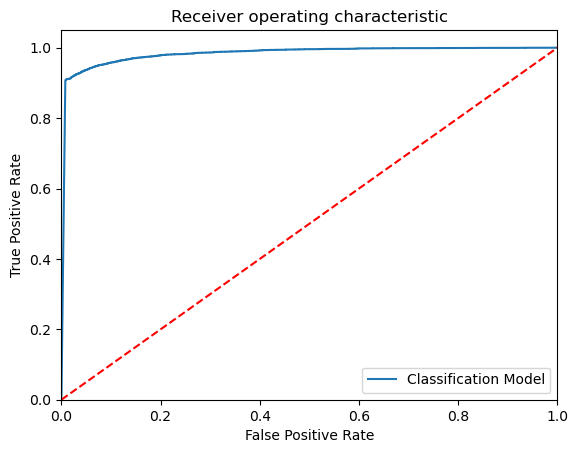

-----------------------------------------------------------------------------------------------------


In [291]:
#NAIVE BAES MODEL

# Training the Naive Bayes model (GaussianNB) on the Training set

from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

# Fit the model with train data

modelGNB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelGNB.predict(x_test)
y_pred_prob = modelGNB.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,modelGNB.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
 #----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : modelGNB,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
CSResults = CSResults.append(new_row, ignore_index=True)

In [292]:
CSResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,KNN K Value
0,LogisticRegression(),12858,1749,110,73881,0.979,0.992,0.880,0.933,0.999,MCC,0.939388,0.940,NaN
1,DecisionTreeClassifier(),14142,465,929,73062,0.984,0.938,0.968,0.953,0.987,MCC,0.977805,0.978,NaN
2,"(DecisionTreeClassifier(max_features='sqrt', r...",14219,388,68,73923,0.995,0.995,0.973,0.984,0.999,MCC,0.986259,0.986,NaN
3,"(ExtraTreeClassifier(random_state=1470271045),...",14334,273,64,73927,0.996,0.996,0.981,0.988,0.999,MCC,0.990223,0.990,NaN
4,KNeighborsClassifier(),13274,1333,697,73294,0.977,0.950,0.909,0.929,0.991,0.916,0.949661,0.950,5.0
5,SVM - Polynominal,1283,220,6,7351,0.974,0.995,0.854,0.919,0.999,0.908,0.926405,0.926,NaN
6,GaussianNB(),5017,484,1340,72461,0.977,0.789,0.912,0.846,0.982,MCC,0.946930,0.947,NaN


In [293]:
# Predict the values with Naive Bayes model (GaussianNB) Algorithm

y_predF = modelGNB.predict(x_test)

In [294]:
Results = pd.DataFrame({'Claimed_A':y_test, 'Claimed_P_F':y_predF})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Auto_Claim_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F
118123,8/10/2018,IL-160698009,Car,1479.82,EA,AZ,29,Male,Married,PhD,ITENGINEER,14,Commute,14390,0,0,Balanced,CL144120603,No,9/30/2018,No,No,No,8.09,Chevrolet,30731.20,Semi Urban,Major,No,0,0
43049,2/3/2017,VU-154777890,Car,1320.20,EA,NV,48,Female,Married,Masters,Engineer,34,Pleasure,16136,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,1.92,Hyundai,13011.10,Semi Urban,Major,No,0,0
8383,1/3/2017,JI-147439828,Car,1395.25,EA,OR,32,Male,Single,Bachelors,Engineer,14,Pleasure,14254,1,1,Basic,CL000020227,No,1/2/2019,Yes,No,No,15381.61,BMW,18938.53,Semi Urban,Major,Yes,1,1
152725,7/5/2011,WU-151417756,Truck,1494.10,IA,CA,33,Male,Single,High School,Engineer,7,Pleasure,16335,0,0,Balanced,CL000025321,No,3/24/2015,Yes,No,Yes,0.00,GM,24654.95,Rural,Major,Yes,1,1
274688,2/24/2018,XK-177762708,Van,1582.76,IA,AZ,22,Male,Married,High School,Worker,22,Business,16236,0,0,Enhanced,CL144120603,No,9/30/2018,No,No,No,0.00,Chevrolet,16057.22,Semi Urban,Major,No,0,0


In [295]:
# Calculate the %of Error

ResultsFinal['%Error'] = round(((ResultsFinal['Claimed_A']-ResultsFinal['Claimed_P_F'])/ResultsFinal['Claimed_A'])*100,3)

In [296]:
# Display the results

ResultsFinal.sample(5)

,Inception_Date,Policy_Number,Policy_Type,Policy_Premium,Channel,State,Age,Gender,Marital_Status,Education,Profession,Driving_Exp,Vehicle_Usage,Annual_Miles,Previous_Citations,Prevous_Accidents,Coverage_Type,Claim_Number,Umbrella_Policy,Accident_Date,Police_File,Any_Eye_Witness,Hired_Attorney,Claim_Paid_Out,Make,Vehicle_Cost,Road_Type,Accident_Severity,Claimed,Claimed_A,Claimed_P_F,%Error
73440,9/12/2014,VX-188359411,Van,1383.85,EA,CA,29,Male,Single,Bachelors,ITENGINEER,8,Pleasure,16259,1,1,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Honda,19201.13,Semi Urban,Major,No,0,0,NaN
282732,4/6/2016,BJ-164654416,Car,1766.96,IA,NV,69,Female,Divorced,Masters,Manager,51,Commute,25339,1,1,Enhanced,CL000026373,Yes,6/5/2016,Yes,No,No,1866.80,Bugatti,27903.06,Semi Urban,Major,Yes,1,1,0.0
269579,12/24/2016,OQ-146259096,Car,1730.79,IA,OR,40,Female,Married,Bachelors,Engineer,49,Commute,33367,0,1,Balanced,CL144120603,No,1/2/2019,No,No,No,0.00,Ford,19957.81,Semi Urban,Major,No,0,0,NaN
227926,6/8/2016,BQ-188181407,Truck,1456.37,IA,CA,52,Female,Married,Masters,Engineer,36,Pleasure,24040,0,0,Enhanced,CL144120603,No,1/2/2019,No,No,No,2.57,Ferrari,23303.49,Semi Urban,Major,No,0,0,NaN
233836,6/13/2019,QL-164785575,Car,1773.77,IA,CA,29,Male,Single,Masters,ITENGINEER,16,Pleasure,14272,0,1,Balanced,CL144120603,No,9/30/2018,No,No,No,0.00,Chevrolet,29990.57,Semi Urban,Major,No,0,0,NaN


In [297]:
Naive_Bayes_classifier_analysis=ResultsFinal.copy()

In [298]:
#Export Data Frame to Excel
Naive_Bayes_classifier_analysis.to_excel("C:\\Users\\sriha\\Data Science\\CAPSTONE PROJECT\\SR_20B91A04J11\\Excel files after analysis\\aut_ov_sampling\\Naive_Bayes_classifier_analysis.xlsx")

In [299]:
#Calssification models and comparision of their results

In [300]:
# Load the Results dataset

CSResults_1 = pd.read_csv(r"C:\Users\sriha\Data Science\CAPSTONE PROJECT\SR_20B91A04J11\CSResults_1.csv", header=0)

CSResults_1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 4836   665]
 [   58 73743]]
Outcome values : 
 4836 665 58 73743
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.88      0.93      5501
           0       0.99      1.00      1.00     73801

    accuracy                           0.99     79302
   macro avg       0.99      0.94      0.96     79302
weighted avg       0.99      0.99      0.99     79302

Accuracy : 99.1 %
Precision : 98.8 %
Recall : 87.9 %
F1 Score : 0.93
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 93.9 %
MCC : 0.927
roc_auc_score: 0.939


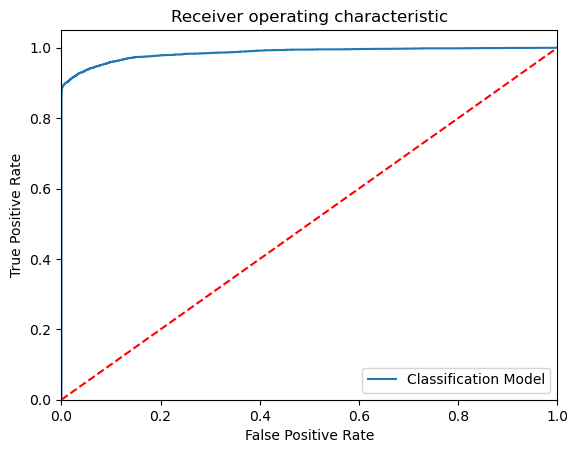

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 4937   564]
 [  722 73079]]
Outcome values : 
 4937 564 722 73079
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.90      0.88      5501
           0       0.99      0.99      0.99     73801

    accuracy                           0.98     79302
   macro avg       0.93      0.94      0.94     79302
weighted avg       0.98      0.98      0.98     79302

Accuracy : 98.4 %
Precision : 87.2 %
Recall : 89.7 %
F1 Score : 0.885
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 94.4 %
MCC : 0.876
roc_auc_score: 0.944


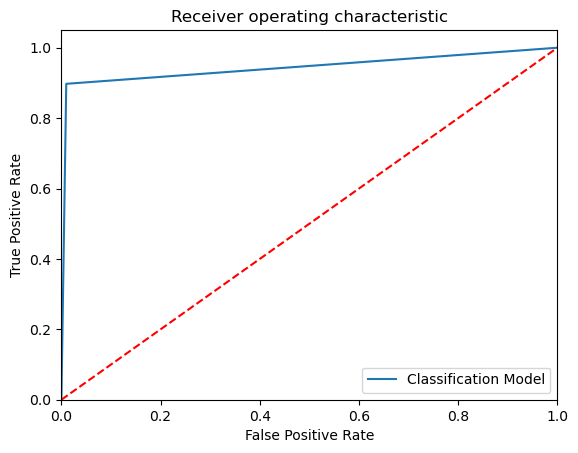

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 4898   603]
 [   34 73767]]
Outcome values : 
 4898 603 34 73767
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.89      0.94      5501
           0       0.99      1.00      1.00     73801

    accuracy                           0.99     79302
   macro avg       0.99      0.94      0.97     79302
weighted avg       0.99      0.99      0.99     79302

Accuracy : 99.2 %
Precision : 99.3 %
Recall : 89.0 %
F1 Score : 0.939
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 94.5 %
MCC : 0.936
roc_auc_score: 0.945


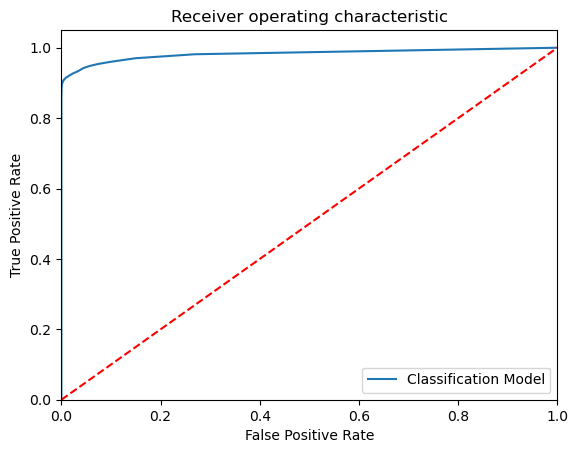

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 4898   603]
 [   43 73758]]
Outcome values : 
 4898 603 43 73758
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.89      0.94      5501
           0       0.99      1.00      1.00     73801

    accuracy                           0.99     79302
   macro avg       0.99      0.94      0.97     79302
weighted avg       0.99      0.99      0.99     79302

Accuracy : 99.2 %
Precision : 99.1 %
Recall : 89.0 %
F1 Score : 0.938
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 94.4 %
MCC : 0.935
roc_auc_score: 0.945


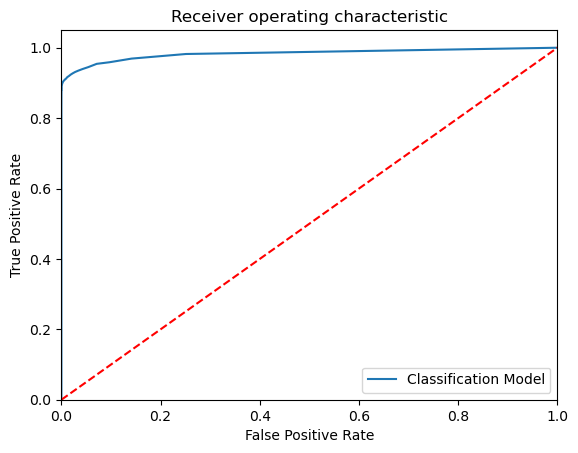

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 4769   732]
 [   81 73720]]
Outcome values : 
 4769 732 81 73720
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.87      0.92      5501
           0       0.99      1.00      0.99     73801

    accuracy                           0.99     79302
   macro avg       0.99      0.93      0.96     79302
weighted avg       0.99      0.99      0.99     79302

Accuracy : 99.0 %
Precision : 98.3 %
Recall : 86.7 %
F1 Score : 0.921
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 93.3 %
MCC : 0.918
roc_auc_score: 0.933


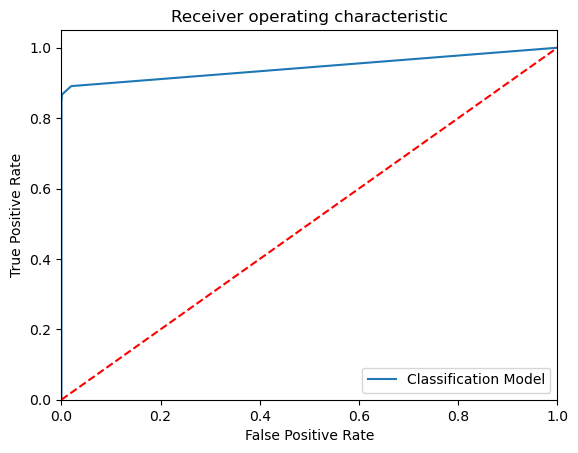

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(base_estimator=None, n_estimators=100)
Confusion matrix : 
 [[ 4905   596]
 [   53 73748]]
Outcome values : 
 4905 596 53 73748
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.89      0.94      5501
           0       0.99      1.00      1.00     73801

    accuracy                           0.99     79302
   macro avg       0.99      0.95      0.97     79302
weighted avg       0.99      0.99      0.99     79302

Accuracy : 99.2 %
Precision : 98.9 %
Recall : 89.2 %
F1 Score : 0.938
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 94.6 %
MCC : 0.935
roc_auc_score: 0.945


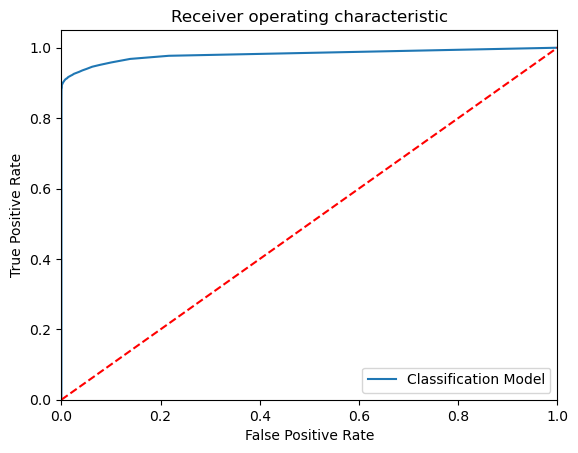

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[ 4906   595]
 [   53 73748]]
Outcome values : 
 4906 595 53 73748
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.89      0.94      5501
           0       0.99      1.00      1.00     73801

    accuracy                           0.99     79302
   macro avg       0.99      0.95      0.97     79302
weighted avg       0.99      0.99      0.99     79302

Accuracy : 99.2 %
Precision : 98.9 %
Recall : 89.2 %
F1 Score : 0.938
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 94.6 %
MCC : 0.935
roc_auc_score: 0.946


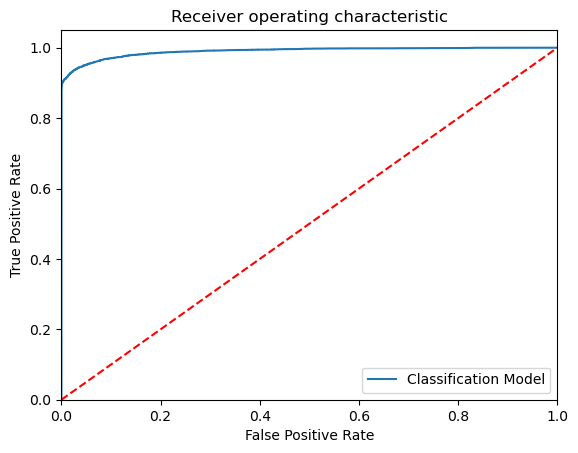

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[ 4917   584]
 [   68 73733]]
Outcome values : 
 4917 584 68 73733
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.89      0.94      5501
           0       0.99      1.00      1.00     73801

    accuracy                           0.99     79302
   macro avg       0.99      0.95      0.97     79302
weighted avg       0.99      0.99      0.99     79302

Accuracy : 99.2 %
Precision : 98.6 %
Recall : 89.4 %
F1 Score : 0.938
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 94.6 %
MCC : 0.935
roc_auc_score: 0.946


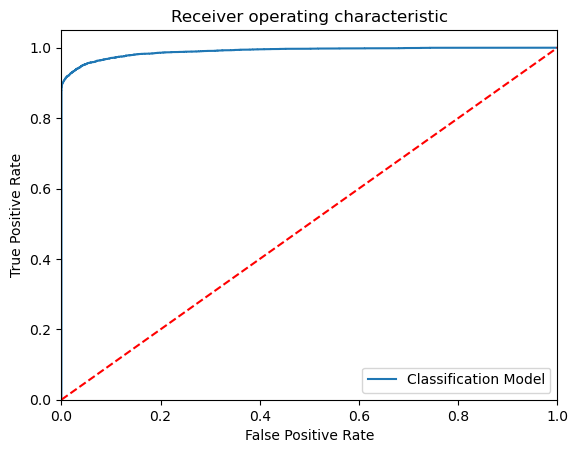

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 5017   484]
 [ 1340 72461]]
Outcome values : 
 5017 484 1340 72461
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.91      0.85      5501
           0       0.99      0.98      0.99     73801

    accuracy                           0.98     79302
   macro avg       0.89      0.95      0.92     79302
weighted avg       0.98      0.98      0.98     79302

Accuracy : 97.7 %
Precision : 78.9 %
Recall : 91.2 %
F1 Score : 0.846
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 94.7 %
MCC : 0.836
roc_auc_score: 0.947


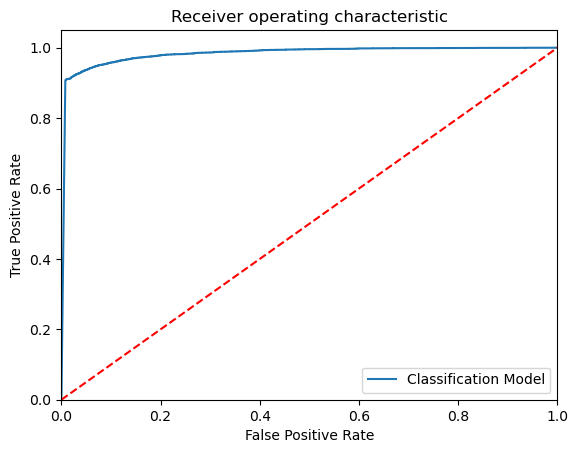

-----------------------------------------------------------------------------------------------------


In [301]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=3)
#ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms
#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG, ModelGB, ModelLGB, ModelGNB]
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, modelBAG, ModelGB, ModelLGB, ModelGNB]
#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    CSResults_1 = CSResults_1.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [302]:
CSResults_1

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),4836,665,58,73743,0.991,0.988,0.879,0.930,0.999,0.927,0.939163,0.939
1,DecisionTreeClassifier(),4937,564,722,73079,0.984,0.872,0.897,0.885,0.990,0.876,0.943845,0.944
2,"(DecisionTreeClassifier(max_features='sqrt', r...",4898,603,34,73767,0.992,0.993,0.890,0.939,1.000,0.936,0.944961,0.945
3,"(ExtraTreeClassifier(random_state=494442797), ...",4898,603,43,73758,0.992,0.991,0.890,0.938,0.999,0.935,0.944900,0.944
4,KNeighborsClassifier(n_neighbors=3),4769,732,81,73720,0.990,0.983,0.867,0.921,0.999,0.918,0.932918,0.933
5,(DecisionTreeClassifier(random_state=160451883...,4905,596,53,73748,0.992,0.989,0.892,0.938,0.999,0.935,0.945469,0.946
6,([DecisionTreeRegressor(criterion='friedman_ms...,4906,595,53,73748,0.992,0.989,0.892,0.938,0.999,0.935,0.945560,0.946
7,LGBMClassifier(),4917,584,68,73733,0.992,0.986,0.894,0.938,0.999,0.935,0.946458,0.946
8,GaussianNB(),5017,484,1340,72461,0.977,0.789,0.912,0.846,0.982,0.836,0.946930,0.947
